In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Funções para gerar gráficos

In [2]:
def num_const(num):
    if num > 1000000000000:
        return f'{num/1000000000000:.1f} tri.'
    if num > 1000000000:
        return f'{num/1000000000:.1f} bi.'
    if num > 1000000:
        return f'{num/1000000:.1f} mi.'
    if num > 1000:
        return f'{num/1000:.1f} mil'
    return f'{num:.1f}'

In [3]:
def histograma(df,coluna,títulos):
    # Configura o tamanho da figura
    plt.figure(figsize=(10, 6))
    
    # Gera o histograma com Seaborn
    sns.histplot(data=df, x=coluna, bins=20, kde=True)
    
    # Adiciona título e rótulos de eixo
    plt.title(títulos)
    plt.xlabel('')
    plt.ylabel('')
    
    # Exibe o gráfico
    plt.grid(True)
    plt.show()

In [4]:
def grafico_linhas(x, y, nome_x, nome_y, titulo=''):
    # Criar figura e eixos
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plotar os dados com Seaborn
    sns.lineplot(x=x, y=y, ax=ax, marker='.', linestyle='-', color='blue')
    
    # Limitar os ticks nos eixos usando MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(nbins=15))  # Limitar ticks no eixo X
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # Limitar ticks no eixo Y
    
    # Configurar título e rótulos dos eixos
    ax.set_title(titulo)
    ax.set_xlabel(nome_x)
    ax.set_ylabel(nome_y)
    
    # Adicionar grade ao gráfico
    ax.grid(True)
    
    # Mostrar o gráfico
    plt.show()

In [5]:
def correlação_heatmap(df):
    # Calculando a matriz de correlação
    correlation_matrix = df.corr()

    # Criando o heatmap com azul no zero e vermelho no ±1
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
    plt.title('Heatmap da Matriz de Correlação (Azul no Zero)')
    plt.show()

In [6]:
def barras_absolutas(série):
    frequencia_absoluta = série.value_counts()

    if série.nunique() > 8:
        largura = 14
    else:
        largura = 8

    # Plotar o gráfico de barras
    plt.figure(figsize=(largura, 6))

    # Adicionar os valores acima das barras
    for index, value in enumerate(frequencia_absoluta):
        plt.text(index, value*1.007, f'{value}', ha='center', fontsize=10)

    frequencia_absoluta.plot(kind='bar', color='skyblue')
    plt.title('Frequência Absoluta')
    plt.xlabel('Categorias')
    plt.ylabel('Frequência')
    plt.show()

In [7]:
def barras_absolutas(série,top_n=30):

    frequencia_absoluta = série.value_counts()
    
    # Limitar aos top N valores
    if len(frequencia_absoluta) > top_n:
        frequencia_absoluta = frequencia_absoluta.head(top_n)

    # Ajuste da largura do plot
    if série.nunique() > 8:
        largura = 14
    else:
        largura = 8

    # Plotar o gráfico de barras com Seaborn
    plt.figure(figsize=(largura, 6))
    sns.barplot(x=frequencia_absoluta.index, y=frequencia_absoluta.values, color='skyblue')

    # Adicionar os valores acima das barras
    for index, value in enumerate(frequencia_absoluta):
        plt.text(index, value*1.007, f'{value}', ha='center', fontsize=10)

    plt.title('Frequência Absoluta')
    plt.xlabel('Categorias')
    plt.ylabel('Frequência')
    plt.show()

In [8]:
def barras_absolutas(série,top_n=30):

    # Calcular a frequência relativa
    frequencia_absoluta = série.value_counts()
    
    # Limitar aos top N valores
    if len(frequencia_absoluta) > top_n:
        frequencia_absoluta = frequencia_absoluta.head(top_n)

    if série.nunique() > 8:
        largura = 14
    else:
        largura = 8

    # Plotar o gráfico de barras
    plt.figure(figsize=(largura, 6))

    # Adicionar os valores acima das barras
    for index, value in enumerate(frequencia_absoluta):
        plt.text(index, value*1.007, f'{value:.2f} %', ha='center', fontsize=10)

    frequencia_absoluta.plot(kind='bar', color='skyblue')
    plt.title('Frequência Relativa')
    plt.xlabel('Categorias')
    plt.ylabel('Percentual')
    plt.show()

In [9]:
def barras_percentuais(série,top_n=30):

    # Calcular a frequência relativa
    frequencia_relativa = série.value_counts(normalize=True) * 100
    
    # Limitar aos top N valores
    if len(frequencia_relativa) > top_n:
        frequencia_relativa = frequencia_relativa.head(top_n)

    if série.nunique() > 8:
        largura = 14
    else:
        largura = 8

    # Plotar o gráfico de barras
    plt.figure(figsize=(largura, 6))

    # Adicionar os valores acima das barras
    for index, value in enumerate(frequencia_relativa):
        plt.text(index, value*1.007, f'{value:.2f} %', ha='center', fontsize=10)

    frequencia_relativa.plot(kind='bar', color='skyblue')
    plt.title('Frequência Relativa')
    plt.xlabel('Categorias')
    plt.ylabel('Percentual')
    plt.show()

In [10]:
# Função para criar gráfico de barras agrupadas
def barras_agregadas(df, Grupo, Categ):
    try:
        # Calcular a tabela cruzada (frequência)
        pivot_df = pd.crosstab(df[Grupo], df[Categ]).reset_index()

        # Transformar a tabela para formato longo (necessário para Seaborn)
        df_melted = pivot_df.melt(id_vars=Grupo, var_name=Categ, value_name='Frequency')

        if df[Grupo].nunique()*df[Categ].nunique() > 8:
            largura = 14
        else:
            largura = 8

        # Plotar o gráfico de barras
        plt.figure(figsize=(largura, 6))
        
        ax = sns.barplot(data=df_melted, x=Grupo, y='Frequency', hue=Categ, dodge=True, palette='viridis')

        # Adicionar valores sobre as barras
        for i, bar in enumerate(ax.patches):
            # Obter posição da barra e altura
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o texto na barra
            y = bar.get_height()
            plt.text(x, y*1.007, f"{int(y)}", ha='center', fontsize=10)

        # Configurar rótulos e título
        ax.set_title(f'Total por {Grupo} e {Categ}')
        ax.set_xlabel(Grupo)
        ax.set_ylabel('')
        ax.legend(title=Categ)

        # Mostrar o gráfico
        plt.show()
    except Exception as e:
        print(f"Error: {e}")


In [11]:
def valor_por_categorias(df,Categoria,Valor,medida='Soma'):
    if medida == 'Soma':
        estimator = np.sum
    if medida == 'Média':
        estimator = np.mean
    if medida == 'Máximo':
        estimator = np.max

    # Criar o gráfico de barras com médias por categoria
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x=Categoria, y=Valor, errorbar=None, palette='cubehelix', estimator=estimator)

    # Configurar rótulos e título
    ax.set_title(f'{medida} de {Valor} por {Categoria}')
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Adicionar os valores das barras nos topos das barras
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,num_const(p.get_height()), ha='center', fontsize=10)
        #ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,num_const(p.get_height()) f'{p.get_height():.2f}', ha='center', fontsize=10)

    # Adicionar uma linha horizontal no valor zero para representar o eixo X
    ax.axhline(0, color='black', linewidth=1)  # Linha preta no valor 0

    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

In [12]:
def contingência(df,coluna1,coluna2):

    # Criar a tabela de contingência (frequência absoluta)
    contingencia = pd.crosstab(df[coluna1], df[coluna2])

    # Normalizar para obter percentuais
    #contingencia_percentual = contingencia.div(contingencia.sum(axis=1), axis=0) * 100
    contingencia_percentual = contingencia.div(len(df)) * 100

    # Criar o heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingencia_percentual, annot=True, cmap='coolwarm', vmin=0, vmax=100, fmt='.2f')
    plt.title(f'Tabela Cruzada - {coluna1} X {coluna2}')
    plt.xlabel(coluna2)
    plt.ylabel(coluna1)
    plt.show()

In [13]:
def scatterplots(df,x,y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x , y=y)

    # Configurar título e rótulos
    plt.title('')
    plt.xlabel(x)
    plt.ylabel(y)

    plt.grid(True)
    plt.show()

# Identificação dos tipos de colunas

In [14]:
open_path = os.path.join('..', 'dataset', 'ativos_filtrados_mapeados.csv')

df = pd.read_csv(open_path,
                 #encoding='latin1',
                 on_bad_lines='skip',
                 engine='python'
                 )

In [15]:
# O começo do dataframe
df.head()

,Unnamed: 0,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nome_da_cidade_no_exterior,...,uf,municipio,ddd1,telefone1,ddd2,telefone2,correio_eletronico,razao_social,capital_social,porte_empresa
0,0,40680973,1,33,Matriz,NaN,Ativa,2021-02-02,0,NaN,...,MG,5425,31.0,99823979,NaN,NaN,DARTASAL@GMAIL.COM,LDA LOCADORA LTDA,100000.0,Micro empresa
1,1,23848696,1,6,Matriz,LAVA JATO VIEIRA,Ativa,2022-06-28,0,NaN,...,ES,5651,28.0,98850866,NaN,NaN,NaN,RV LOCACOES LTDA,150000.0,Micro empresa
2,2,24768304,1,61,Matriz,RASTREK DENILSON,Ativa,2021-05-13,0,NaN,...,CE,1389,85.0,85722855,NaN,NaN,DENILSONFERREIRA26@HOTMAIL.COM,ARGENTINA AZEVEDO DA SILVA,10000.0,Micro empresa
3,3,35018906,1,18,Matriz,NaN,Ativa,2019-09-27,0,NaN,...,PR,7691,44.0,99521016,NaN,NaN,NaN,CASTRO COSTA ADMINISTRADORA DE BENS LTDA,200000.0,Pequeno Porte
4,4,33656354,1,48,Matriz,NaN,Ativa,2019-05-17,0,NaN,...,SP,7107,11.0,26151889,NaN,NaN,MP2LOCADORA@GMAIL.COM,MP2 LOCADORA DE VEICULOS LTDA,100000.0,Pequeno Porte


In [16]:
# Tipos das variáveis e quantidade de pontos não-nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43714 entries, 0 to 43713
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   43714 non-null  int64  
 1   cnpj_basico                  43714 non-null  int64  
 2   cnpj_ordem                   43714 non-null  int64  
 3   cnpj_dv                      43714 non-null  int64  
 4   identificador_matriz_filial  43714 non-null  object 
 5   nome_fantasia                29712 non-null  object 
 6   situacao_cadastral           43714 non-null  object 
 7   data_situacao_cadastral      43293 non-null  object 
 8   motivo_situacao_cadastral    43714 non-null  int64  
 9   nome_da_cidade_no_exterior   254 non-null    object 
 10  pais                         5603 non-null   float64
 11  data_de_inicio_atividade     43714 non-null  object 
 12  cnae_fiscal_principal        43714 non-null  object 
 13  cnae_fiscal_secu

Colunas string que podem ser chave-primária ou descrição.

In [17]:
# Identificar colunas do tipo object
object_columns = df.columns

# Calcular o número de categorias únicas em cada coluna
unique_counts = {col: df[col].nunique() for col in object_columns}

# Exibir os resultados em uma tabela
result_df = pd.DataFrame(list(unique_counts.items()), columns=['Coluna', 'Número de Itens Únicos'])
print(result_df)

                         Coluna  Número de Itens Únicos
0                    Unnamed: 0                   43714
1                   cnpj_basico                   38493
2                    cnpj_ordem                    1135
3                       cnpj_dv                     100
4   identificador_matriz_filial                       2
5                 nome_fantasia                   26634
6            situacao_cadastral                       1
7       data_situacao_cadastral                    5701
8     motivo_situacao_cadastral                       1
9    nome_da_cidade_no_exterior                     135
10                         pais                      44
11     data_de_inicio_atividade                    8368
12        cnae_fiscal_principal                       3
13       cnae_fiscal_secundaria                   19264
14           tipo_de_logradouro                     106
15                   logradouro                   23909
16                       numero                 

	cat
porte_empresa  
uf  
cnae_fiscal_principal  
identificador_matriz_filial  

    num
capital_social  

	datetime
data_de_inicio_atividade  
data_situacao_cadastral  

	não agregável
razao_social  
correio_eletronico  
telefone2  
ddd2  
telefone1  
ddd1  
municipio  
cep  
bairro  
complemento  
numero  
logradouro  
tipo_de_logradouro  
cnae_fiscal_secundaria  
nome_da_cidade_no_exterior  
motivo_situacao_cadastral  
situacao_cadastral  
nome_fantasia  
cnpj_dv  
cnpj_ordem  
cnpj_basico  

Separação de colunas não agregáveis:

In [18]:
Non_Aggregatable = ['razao_social',
                    'correio_eletronico',
                    'telefone2',
                    'ddd2',
                    'telefone1',
                    'ddd1',
                    'municipio',
                    'cep',
                    'bairro',
                    'complemento',
                    'numero',
                    'logradouro',
                    'tipo_de_logradouro',
                    'cnae_fiscal_secundaria',
                    'nome_da_cidade_no_exterior',
                    'motivo_situacao_cadastral',
                    'situacao_cadastral',
                    'nome_fantasia',
                    'cnpj_dv',
                    'cnpj_ordem',
                    'cnpj_basico']

In [19]:
Categorical = ['uf',
               'cnae_fiscal_principal',
               'porte_empresa',
               'identificador_matriz_filial']

In [20]:
Numerical = ['capital_social']

In [21]:
DateTime = ['data_situacao_cadastral',
            'data_de_inicio_atividade']

In [22]:
df_a = df[Categorical+Numerical+DateTime]

## Ajuste dos tipos de variáveis

Conversão para DateTime.

In [23]:
def convert_datetime_columns(df):
    newdf = df.copy()
    for col in newdf.select_dtypes(include=['object']).columns:
        try:
            newdf[col] = pd.to_datetime(newdf[col], errors='raise', dayfirst=True)
        except ValueError:
            try:
                newdf[col] = pd.to_datetime(newdf[col], errors='raise')
            except ValueError:
                pass
    
    return newdf

In [24]:
df_time = convert_datetime_columns(df_a)

In [25]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43714 entries, 0 to 43713
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   uf                           43714 non-null  object        
 1   cnae_fiscal_principal        43714 non-null  object        
 2   porte_empresa                43488 non-null  object        
 3   identificador_matriz_filial  43714 non-null  object        
 4   capital_social               43714 non-null  float64       
 5   data_situacao_cadastral      43293 non-null  datetime64[ns]
 6   data_de_inicio_atividade     43714 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 2.3+ MB


Conversão de numéricos para categóricos:

In [26]:
df_t = df_time.copy()
for col in Categorical:
    df_t[col] = df_time[col].astype('object')

In [27]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43714 entries, 0 to 43713
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   uf                           43714 non-null  object        
 1   cnae_fiscal_principal        43714 non-null  object        
 2   porte_empresa                43488 non-null  object        
 3   identificador_matriz_filial  43714 non-null  object        
 4   capital_social               43714 non-null  float64       
 5   data_situacao_cadastral      43293 non-null  datetime64[ns]
 6   data_de_inicio_atividade     43714 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 2.3+ MB


In [28]:
df_n = df_t[Numerical]
df_c = df_t[Categorical]

# Apresentação dos Dados

Variáveis numéricas

Tamanho do dataset:

In [29]:
n_l = df_t.shape[0]
n_c = df_t.shape[1]

print(f'''Itens relevantes:
{' '*(10-len(str(n_c)))}{n_c} variáveis.
{' '*(10-len(str(n_l)))}{n_l} instâncias.''')

Itens relevantes:
         7 variáveis.
     43714 instâncias.


Tipos das variáveis:

In [30]:
print('       Tipos presentes no dataframe:')
for i in set(df_t.dtypes):
    print(f'{i}:')
    for col in df_t.columns:
        if i == df_t[col].dtypes:
            print(f'  {col}')

       Tipos presentes no dataframe:
datetime64[ns]:
  data_situacao_cadastral
  data_de_inicio_atividade
float64:
  capital_social
object:
  uf
  cnae_fiscal_principal
  porte_empresa
  identificador_matriz_filial


Contagem de valores ausentes;

In [31]:
nan_counts = df.isna().sum()
print("Contagem de NaN por coluna:")
print(nan_counts)

Contagem de NaN por coluna:
Unnamed: 0                         0
cnpj_basico                        0
cnpj_ordem                         0
cnpj_dv                            0
identificador_matriz_filial        0
nome_fantasia                  14002
situacao_cadastral                 0
data_situacao_cadastral          421
motivo_situacao_cadastral          0
nome_da_cidade_no_exterior     43460
pais                           38111
data_de_inicio_atividade           0
cnae_fiscal_principal              0
cnae_fiscal_secundaria         10956
tipo_de_logradouro               398
logradouro                         0
numero                             0
complemento                    20166
bairro                            46
cep                              321
uf                                 0
municipio                          0
ddd1                            1182
telefone1                       1182
ddd2                           33020
telefone2                      33043
correio_el

In [32]:
missing = df.isna().any(axis=1).sum()
print(f'{missing} instâncias têm algum valor ausent.')
print(f'{missing*100/len(df)}% do dataset está incompleto.')

43714 instâncias têm algum valor ausent.
100.0% do dataset está incompleto.


Medidas das variáveis numéricas.

In [33]:
resumo = df_n.describe().T
resumo = resumo.drop(columns=['count'])
resumo = resumo.rename(columns={
    'mean': 'Média',
    'std': 'Desvio-padrão',
    'min': 'Mínimo',
    '25%': '1º Quartil',
    '50%': 'Mediana',
    '75%': '3º Quartil',
    'max': 'Máximo'
})

resumo['Amplitude'] = resumo['Máximo'] - resumo['Mínimo']
resumo['Coeficiente de Variação'] = resumo['Desvio-padrão'] / resumo['Média']

moda = df_n.apply(lambda x: x.mode().values[0])

# Calcular a variância
variance = df_n.var()

# Incluir essas medidas no resumo
resumo['Moda'] = moda
resumo['Variância'] = variance


In [34]:
resumo

,Média,Desvio-padrão,Mínimo,1º Quartil,Mediana,3º Quartil,Máximo,Amplitude,Coeficiente de Variação,Moda,Variância
capital_social,6.250130e+08,2.949328e+09,0.0,20000.0,100000.0,300000.0,3.394829e+10,3.394829e+10,4.718826,100000.0,8.698534e+18


Boxplots:

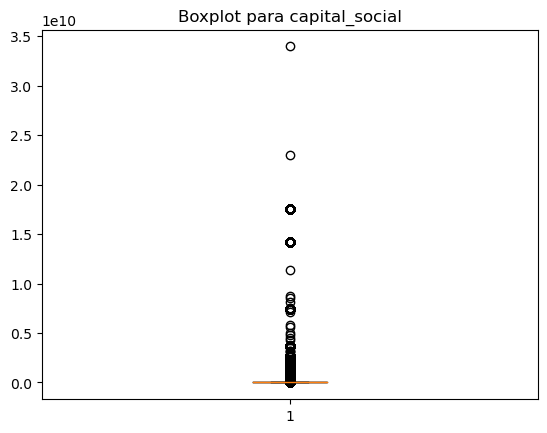

In [35]:
for col in df_n.columns:
    plt.boxplot(df_n[col])
    plt.title(f'Boxplot para {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Percentis:

In [36]:
percent_array = np.arange(0,101)    # Isto cria um array com 101 números, de 0 a 100.

percentil_df = pd.DataFrame()
percentil_df['Percentil'] = percent_array    # Os percentuais correspondem a uma coluna do dataframe
percentil_df['Percentil'] = percentil_df['Percentil'].apply(lambda x: str(f'{x}%'))    # Isso deixa a coluna com formato percentual

for col in df_n:
    percentil_df[col] = np.percentile(df_n[col], percent_array)    # Para cada coluna numérica, uma coluna com apenas os percentis.

In [37]:
percentil_df

,Percentil,capital_social
0,0%,0.000000e+00
1,1%,0.000000e+00
2,2%,0.000000e+00
3,3%,0.000000e+00
4,4%,1.000000e+03
...,...,...
96,96%,3.705955e+09
97,97%,1.418939e+10
98,98%,1.754898e+10
99,99%,1.754898e+10


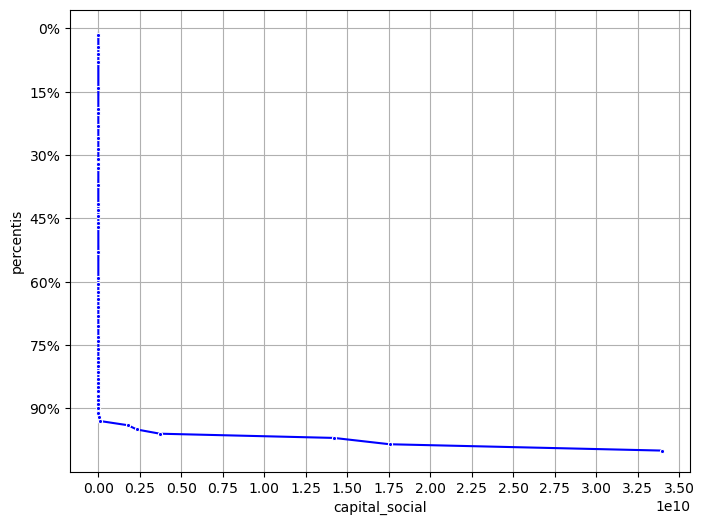

In [38]:
for col in percentil_df.columns:
    if col != 'Percentil':
        grafico_linhas(percentil_df[col],percentil_df['Percentil'],col,'percentis')

Histogramas:

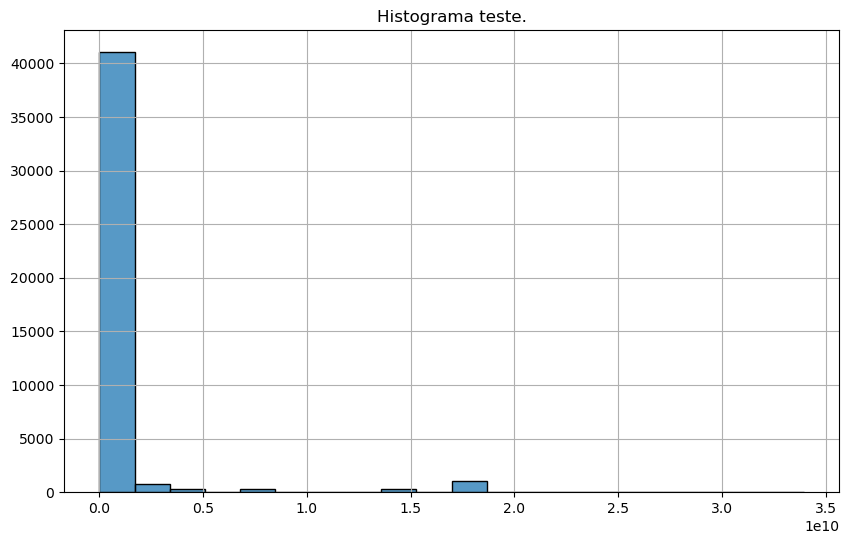

In [39]:
plt.figure(figsize=(10, 6))

# Gera o histograma com Seaborn
sns.histplot(data=df_n, x='capital_social', bins=20)

# Adiciona título e rótulos de eixo
plt.title('Histograma teste.')
plt.xlabel('')
plt.ylabel('')

# Exibe o gráfico
plt.grid(True)
plt.show()

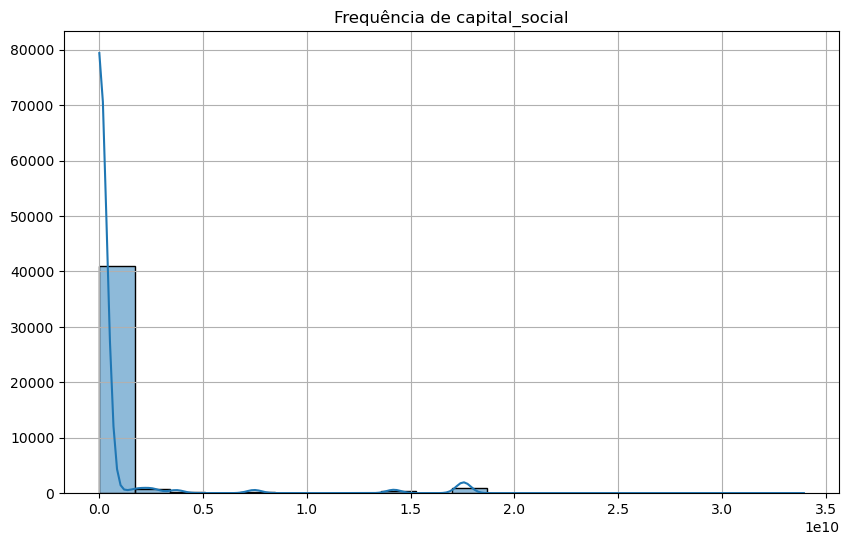

In [40]:
for col in df_n.columns:
    histograma(df_n,col,f'Frequência de {col}')

Scatterplot

In [41]:
incluso = []
for col1 in df_n.columns:
    incluso.append(col1)
    for col2 in df_n.columns:
        if col2 not in incluso:
            scatterplots(df_n, col1, col2)

Kernel Density Estimate - KDE

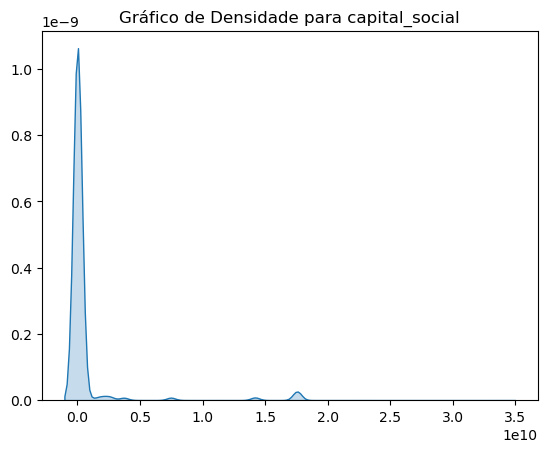

In [42]:
for col in df_n.columns:
    sns.kdeplot(df_n[col], fill=True)
    plt.title(f'Gráfico de Densidade para {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Identificação de Outlier - pontos fora do intervalo interquartis.

In [43]:
# Calcular os limites para outliers em cada coluna numérica
outlier_indices = {}
for col in df_n.columns:
    Q1 = df_n[col].quantile(0.25)
    Q3 = df_n[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2000 * IQR
    upper_bound = Q3 + 2000 * IQR
    outliers = df_n[(df_n[col] < lower_bound) | (df_n[col] > upper_bound)].index.tolist()
    outlier_indices[col] = outliers

# Exibir os índices de outliers para cada coluna
for col, indices in outlier_indices.items():
    print(f"Índices de outliers na coluna '{col}'")
    for i in indices:
        print(' ',i)

Índices de outliers na coluna 'capital_social'
  13
  21
  44
  60
  72
  73
  75
  77
  90
  152
  183
  269
  281
  285
  287
  293
  296
  300
  317
  326
  327
  330
  337
  346
  347
  348
  352
  359
  360
  364
  399
  415
  492
  544
  651
  734
  823
  1054
  1122
  1123
  1204
  1217
  1223
  1266
  1474
  1479
  1582
  2089
  2185
  2187
  2188
  2191
  2205
  2208
  2227
  2258
  2459
  2981
  2984
  3085
  3118
  3126
  3161
  3211
  3230
  3288
  3289
  3293
  3296
  3302
  3339
  3374
  3508
  3578
  3759
  3906
  3933
  3955
  4064
  4072
  4160
  4162
  4378
  4379
  4386
  4391
  4396
  4609
  4777
  4805
  4916
  4996
  5170
  5178
  5196
  5254
  5326
  5345
  5376
  5498
  5585
  5654
  5683
  5823
  6091
  6127
  6166
  6255
  6486
  6487
  6489
  6559
  6652
  6721
  6942
  6981
  7070
  7113
  7264
  7268
  7367
  7371
  7373
  7378
  7380
  7382
  7386
  7388
  7389
  7391
  7392
  7411
  7442
  7447
  7464
  7511
  7516
  7521
  7522
  7610
  7628
  7667
  780

Matriz de correlação:

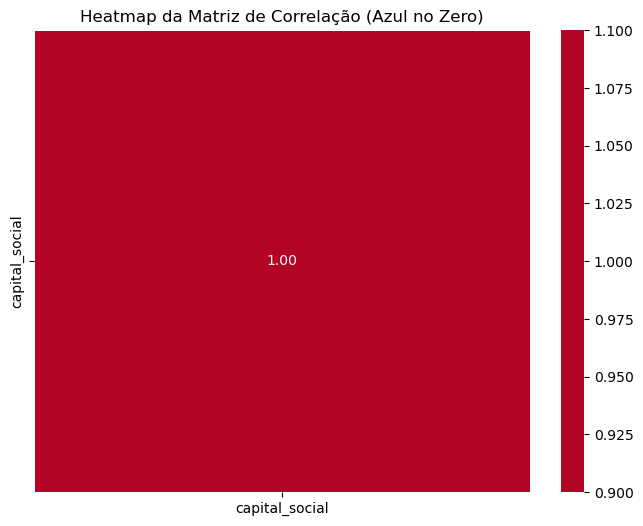

In [44]:
# "Quente" nas extremidades
correlação_heatmap(df_n)

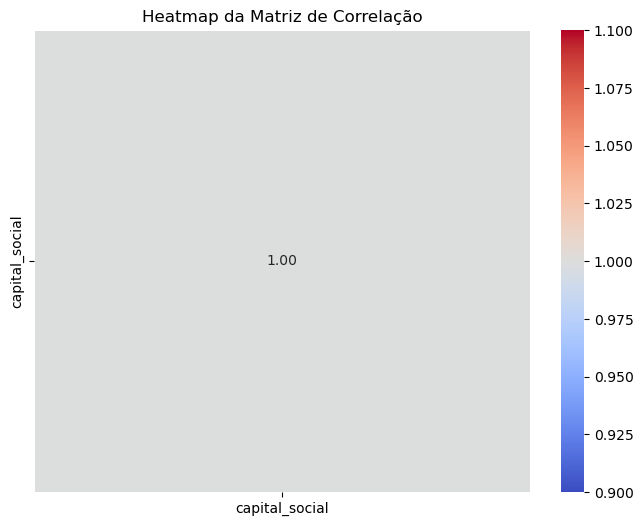

In [45]:
correlation_matrix = df_n.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

## Variáveis categóricas

Gráficos de barras:

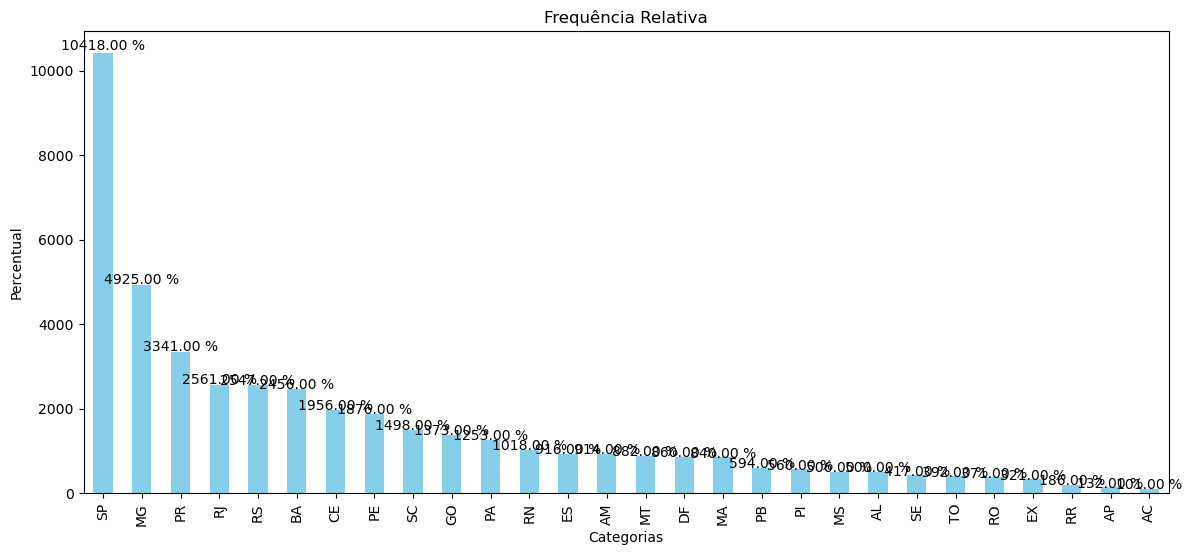

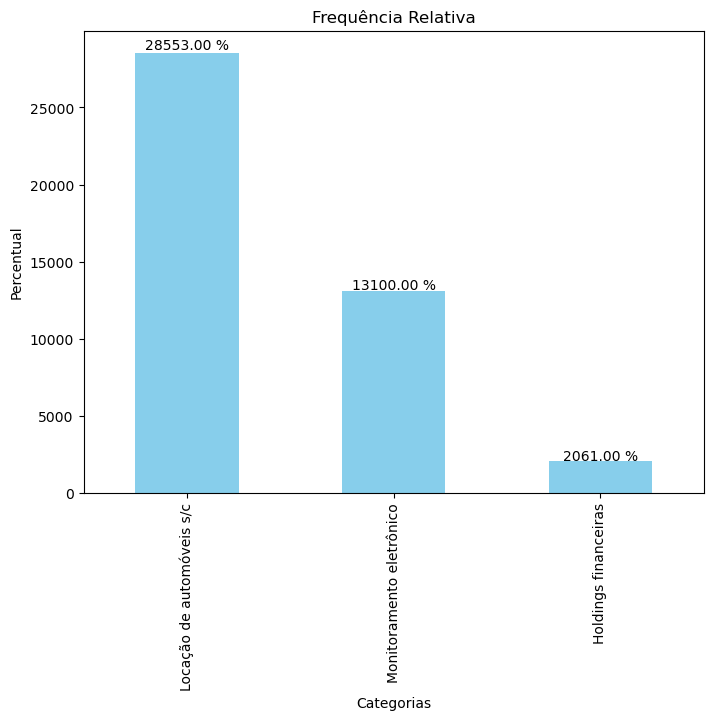

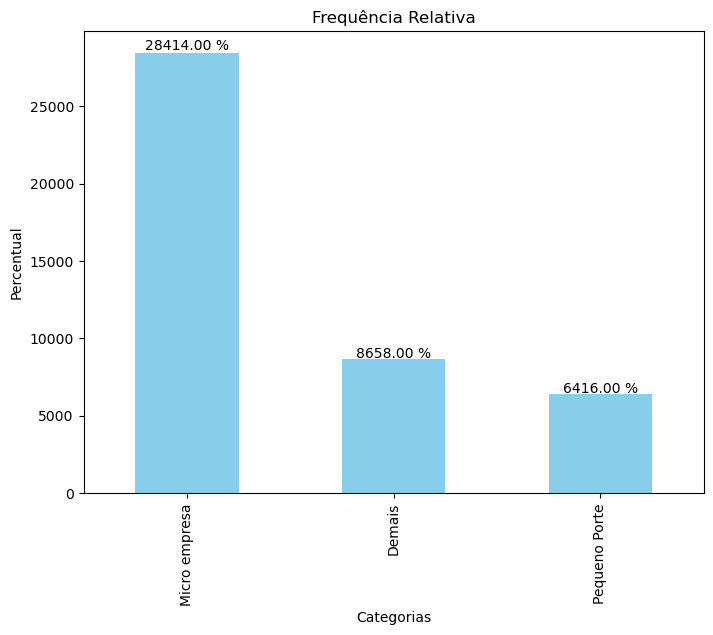

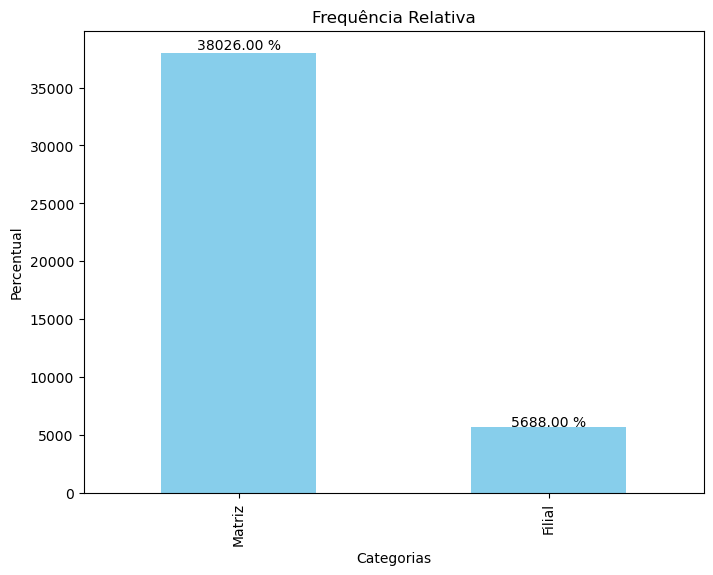

In [46]:
for col in df_c.columns:
    barras_absolutas(df_c[col])

Frequência relativa.

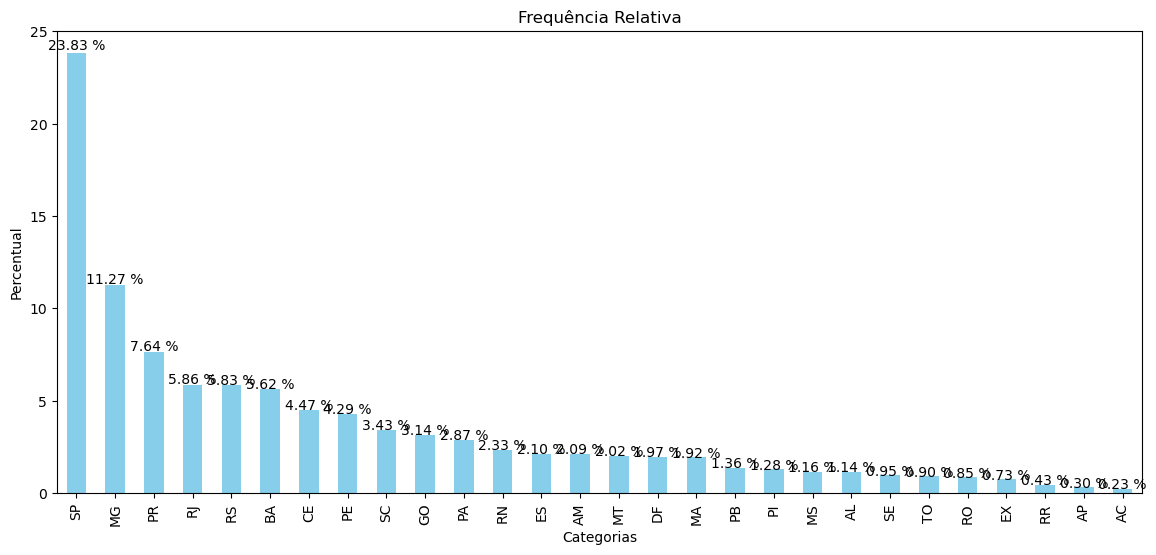

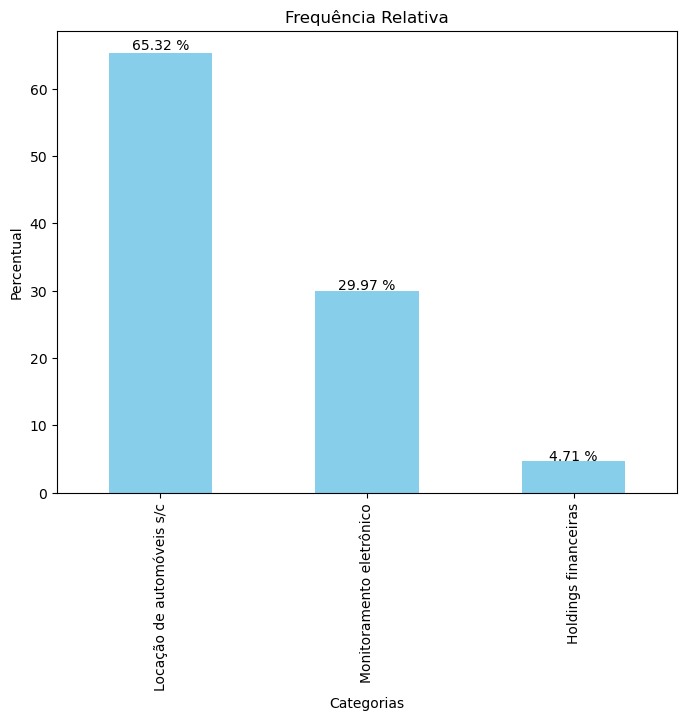

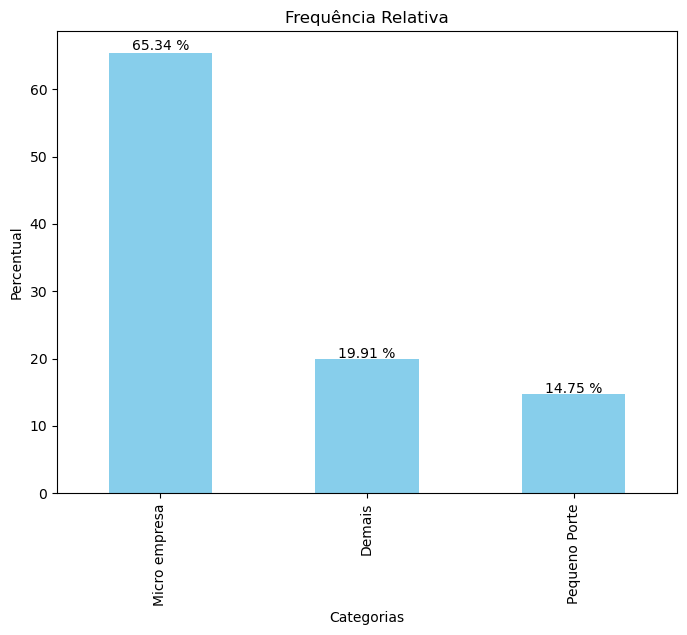

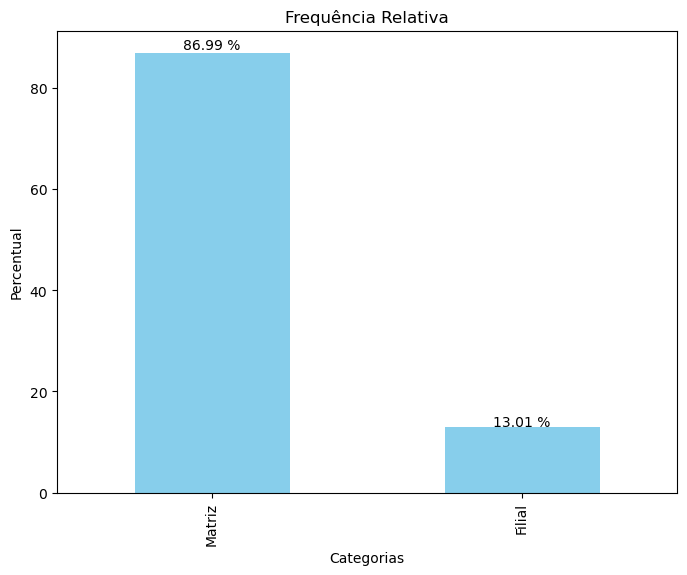

In [47]:
for col in df_c.columns:
    barras_percentuais(df_c[col])

Frequência por subcategorias.

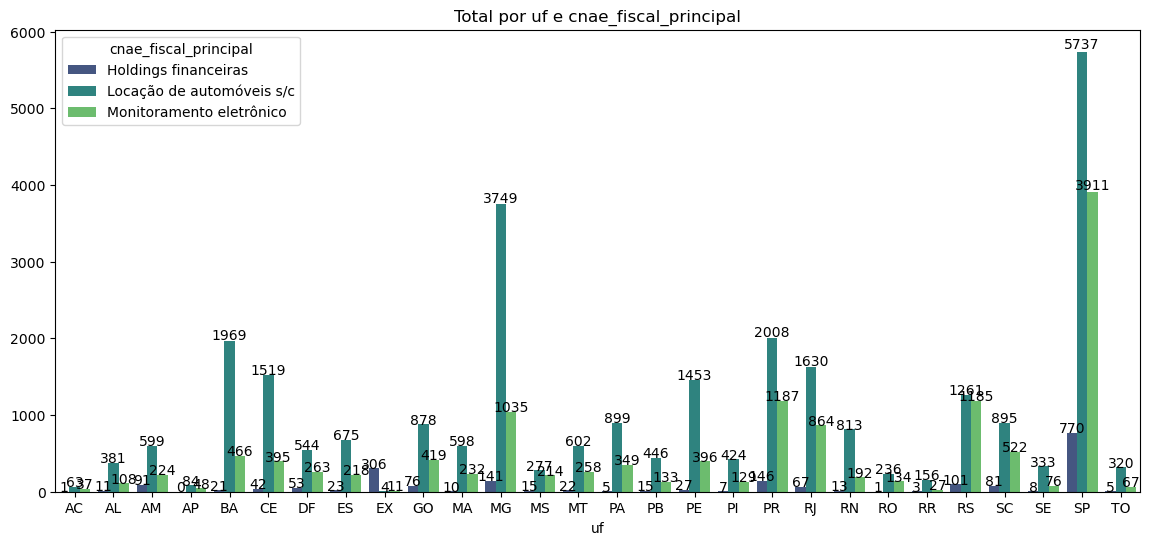

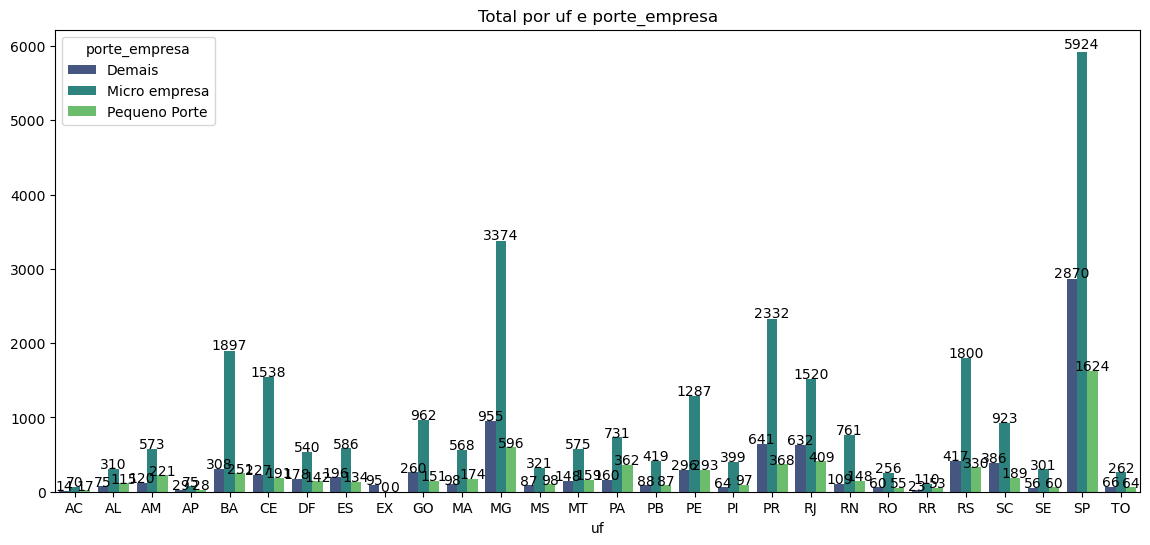

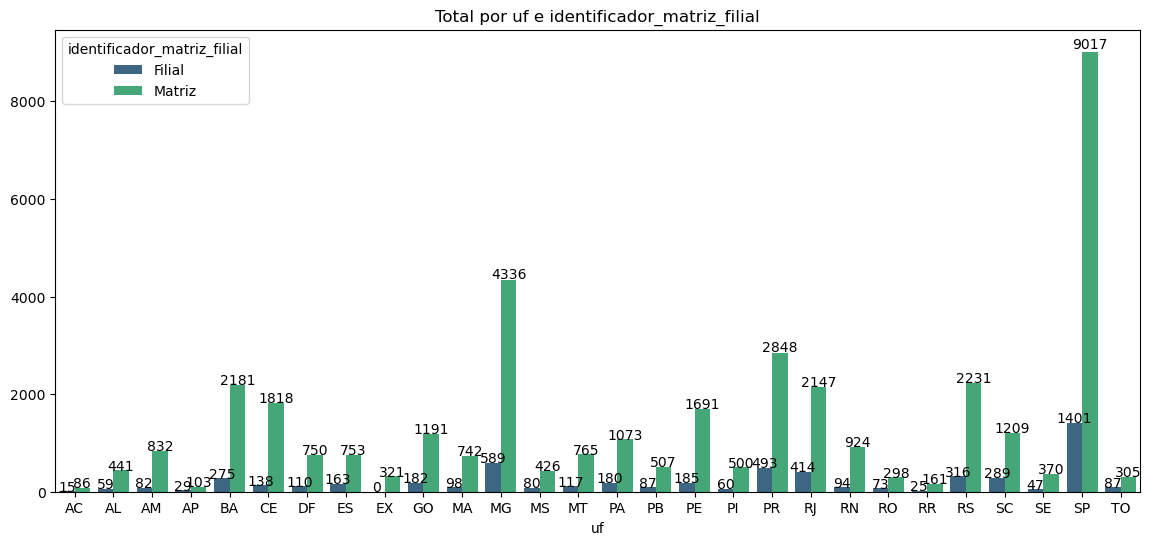

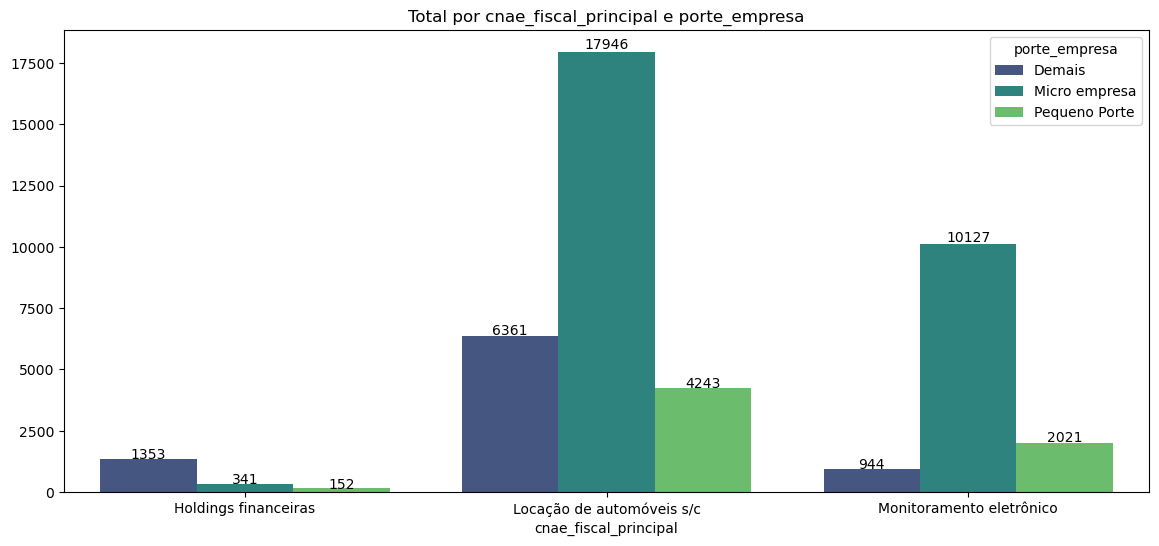

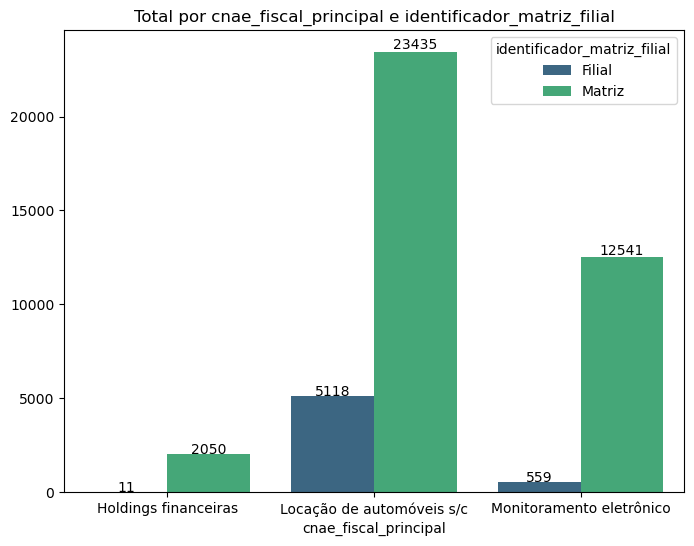

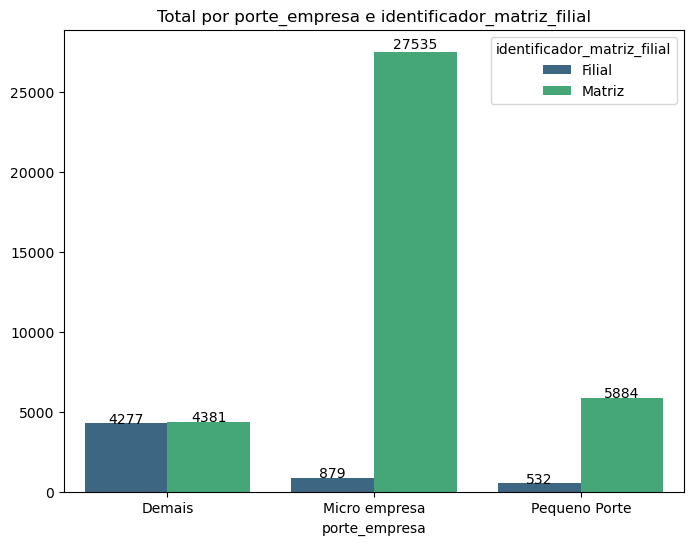

In [48]:
incluso = []
for grupo in df_c.columns:
    incluso.append(grupo)
    for categoria in df_c.columns:
        if categoria not in incluso and categoria not in ['municipio_f','bairro_h'] and grupo not in ['municipio_f','bairro_h']:
            barras_agregadas(df,grupo,categoria)

Contingência percentual

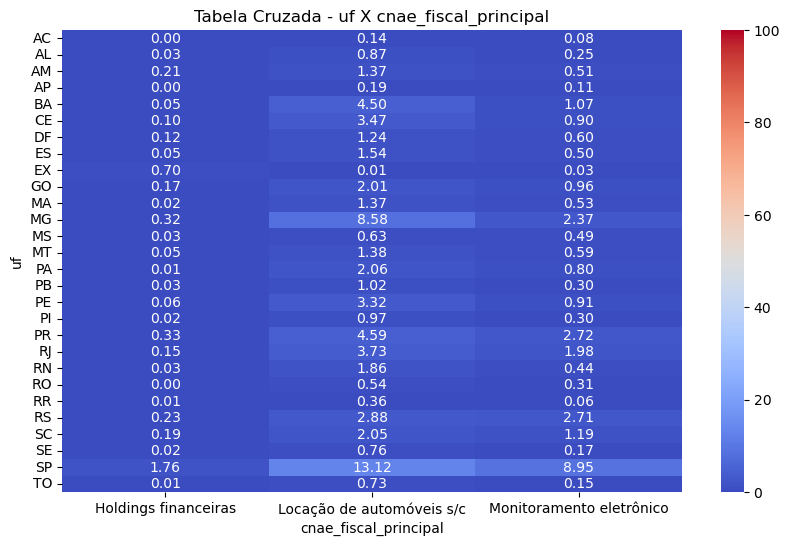

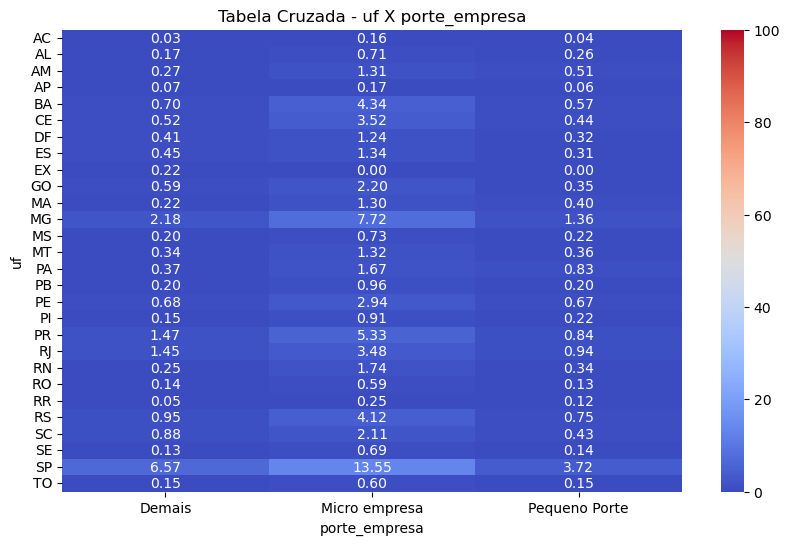

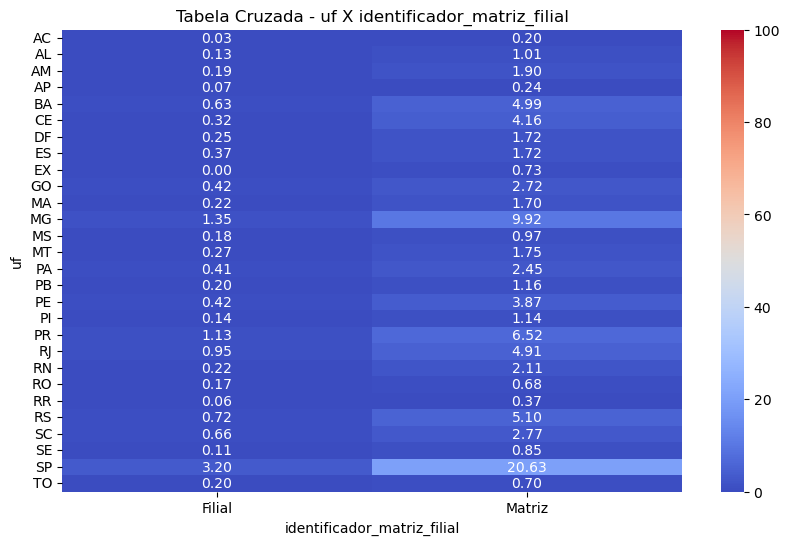

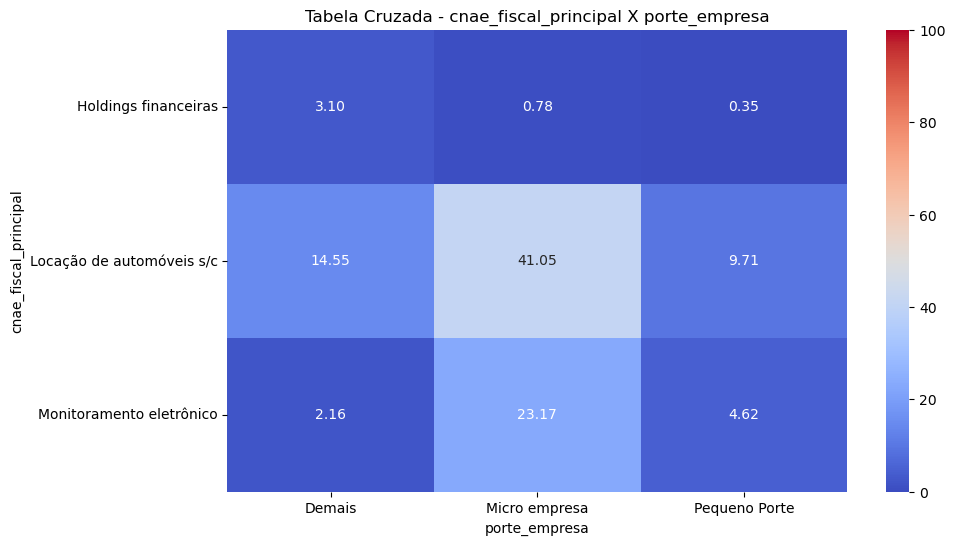

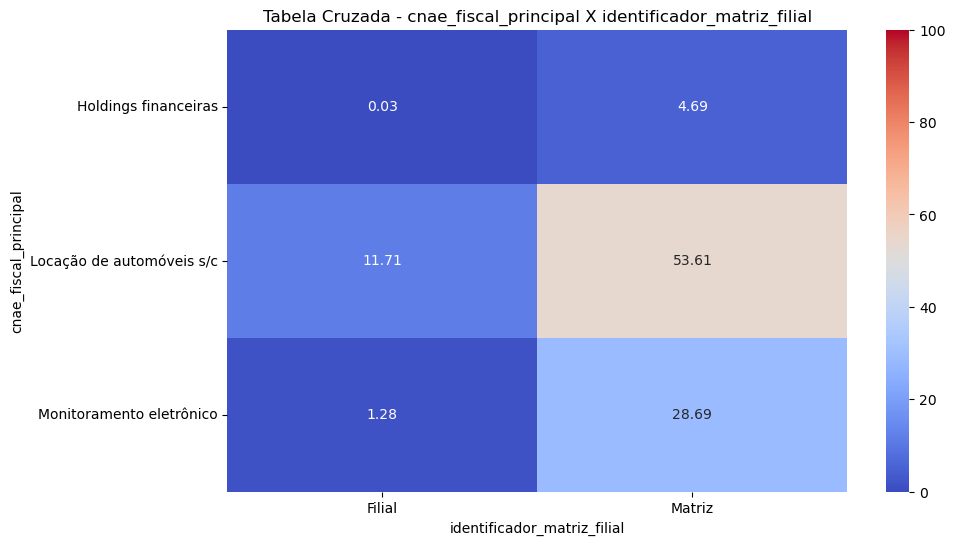

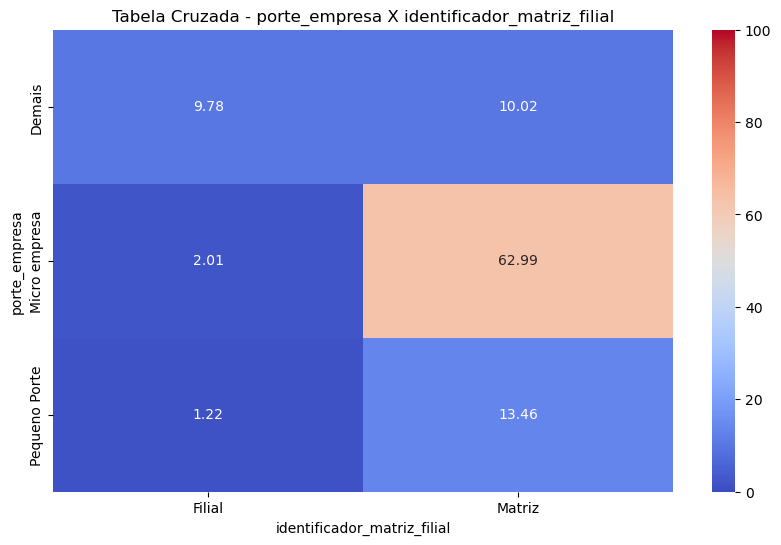

In [49]:
incluso = []
for coluna1 in df_c.columns:
    incluso.append(coluna1)
    for coluna2 in df_c.columns:
        if coluna2 not in incluso:
            contingência(df,coluna1,coluna2)

## Variáveis numéricas filtradas por categorias

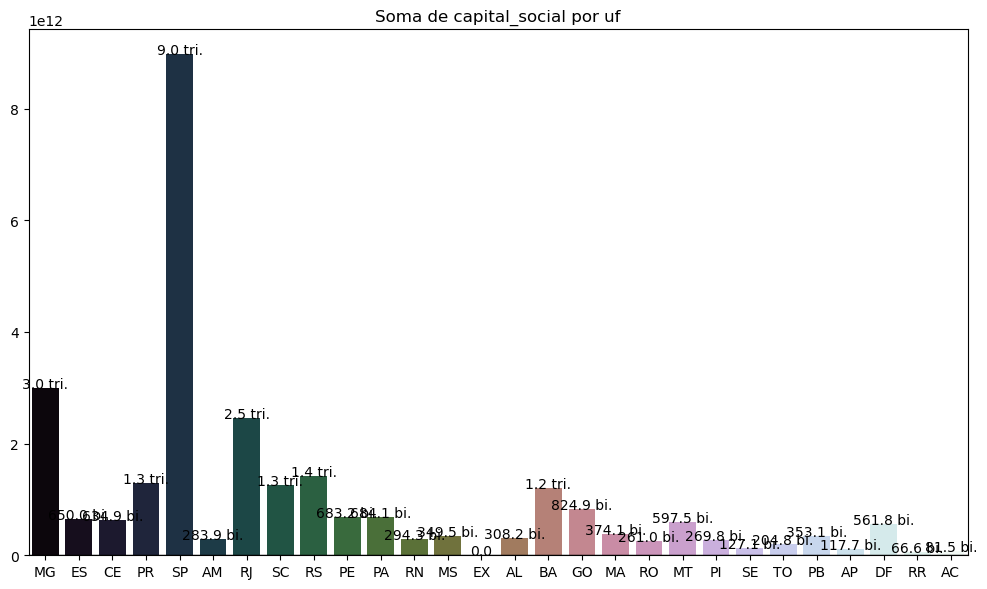

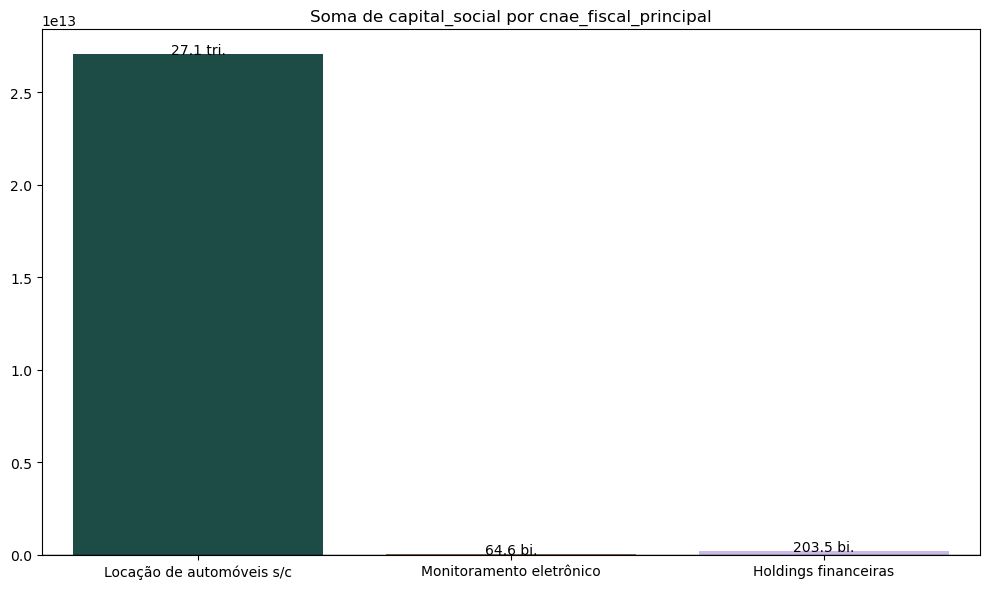

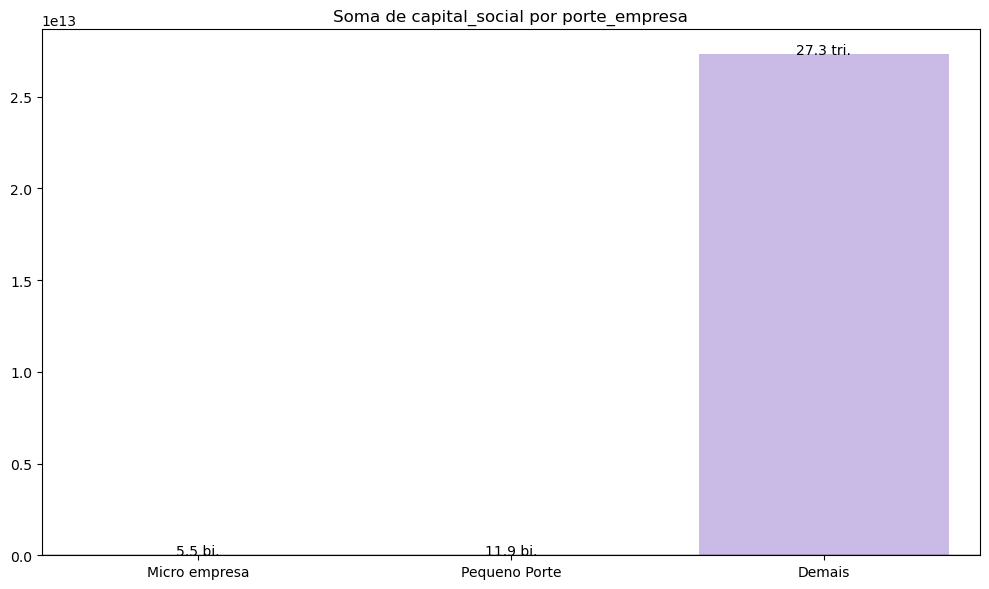

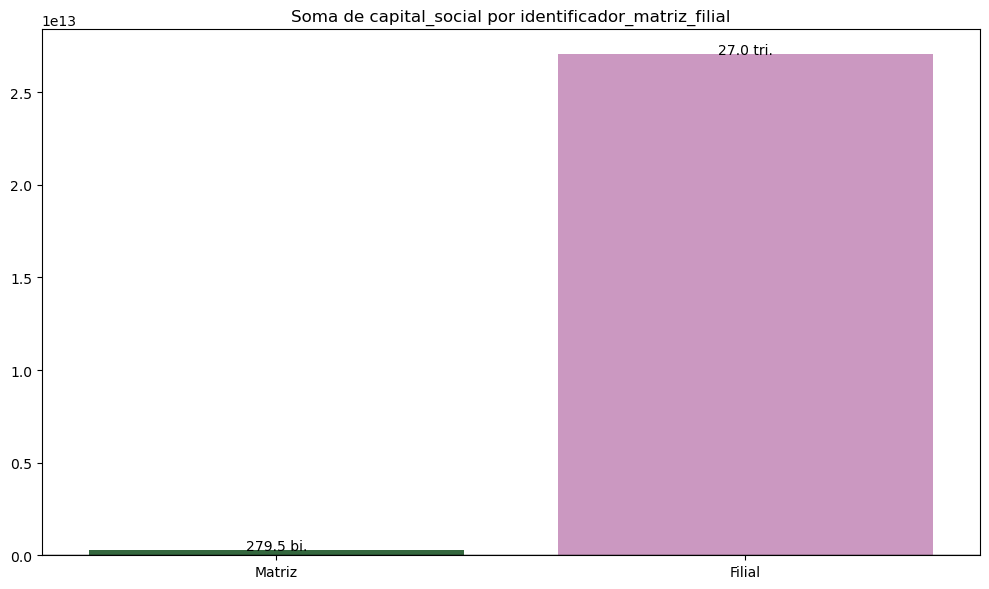

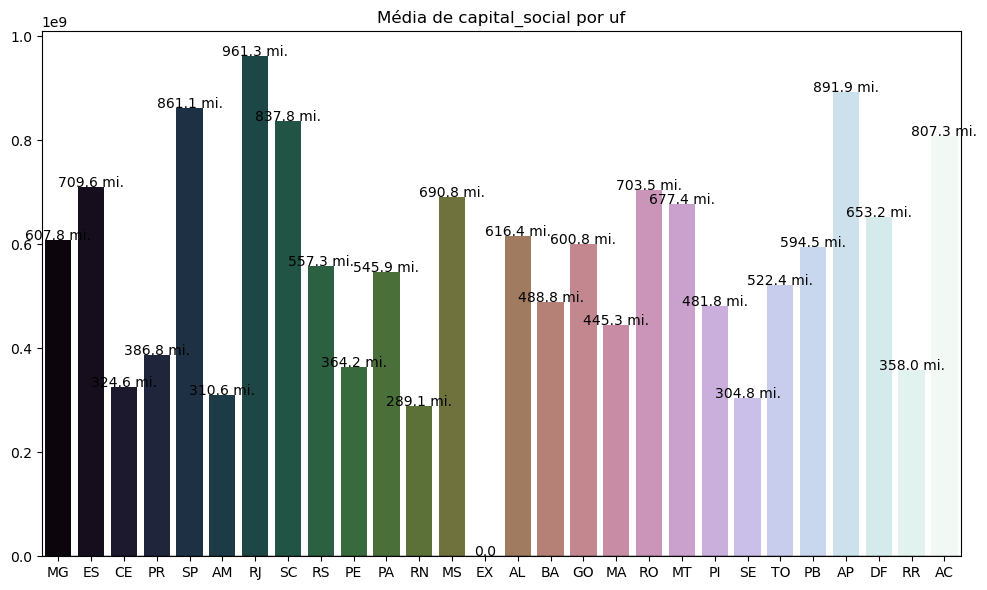

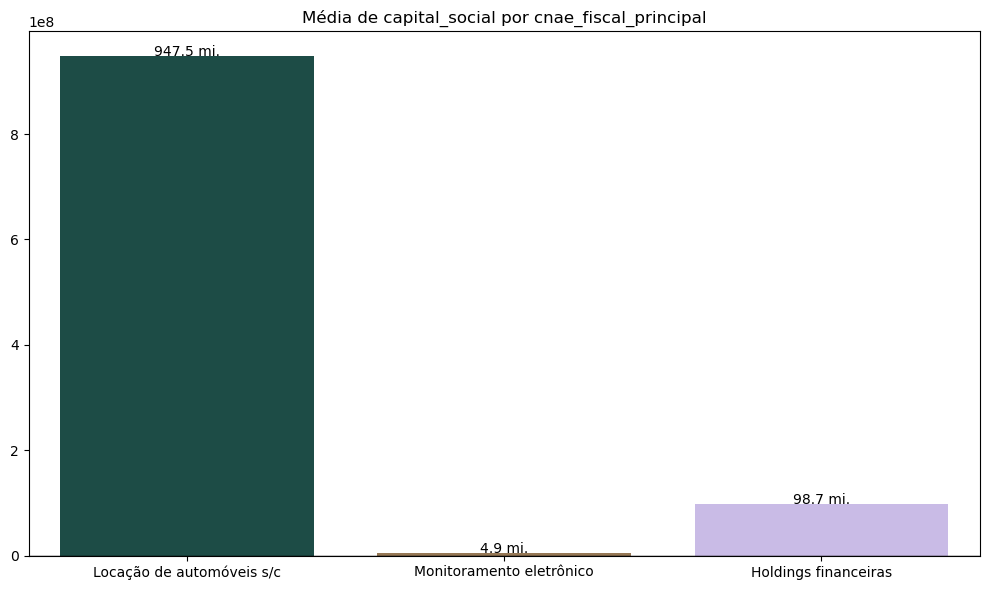

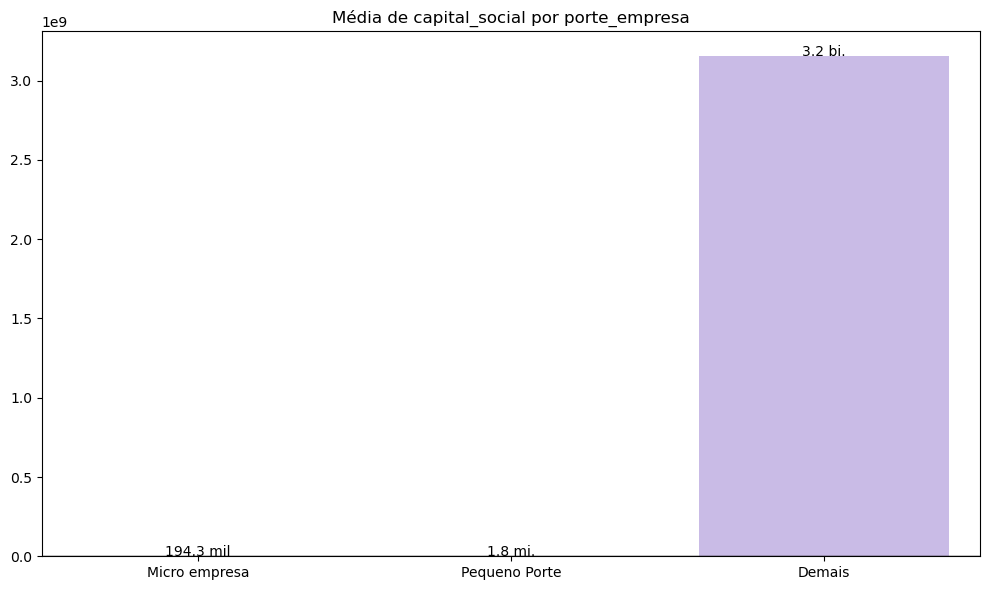

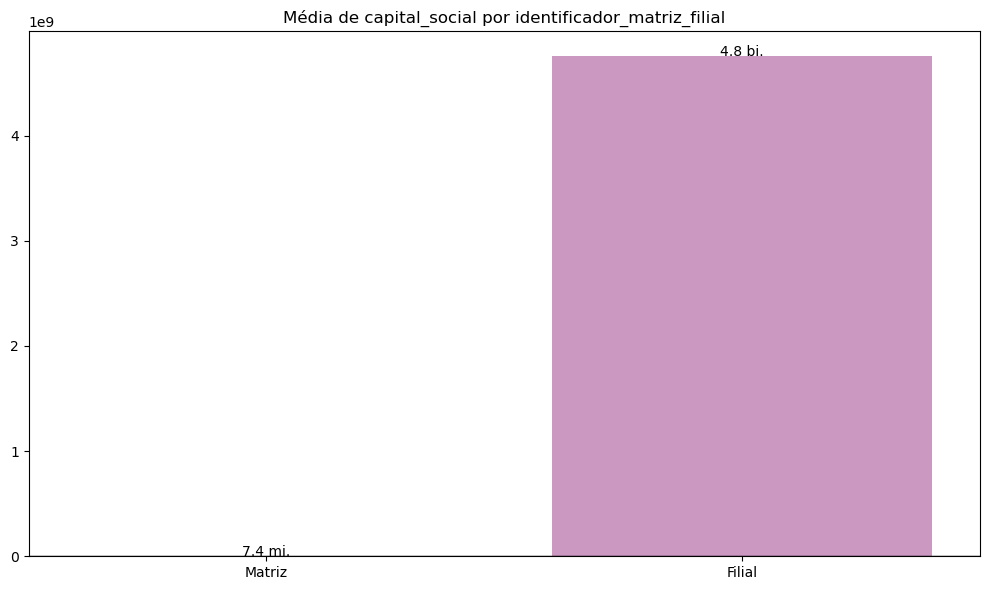

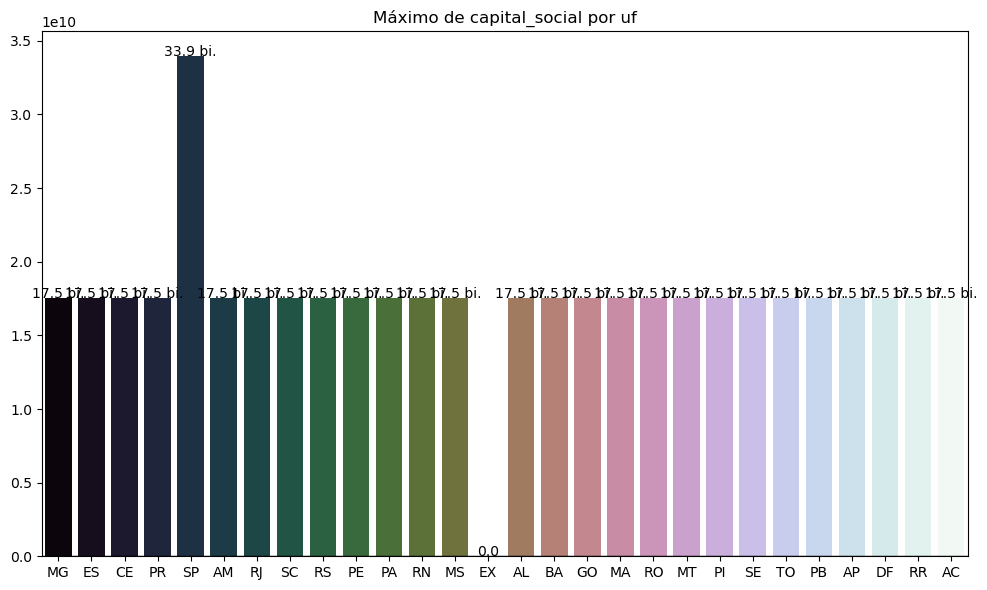

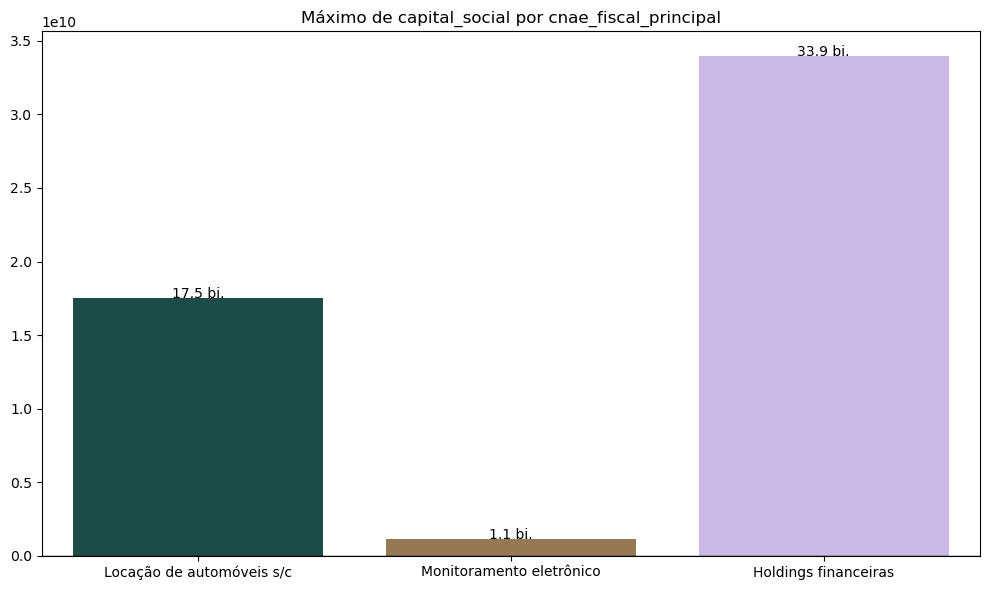

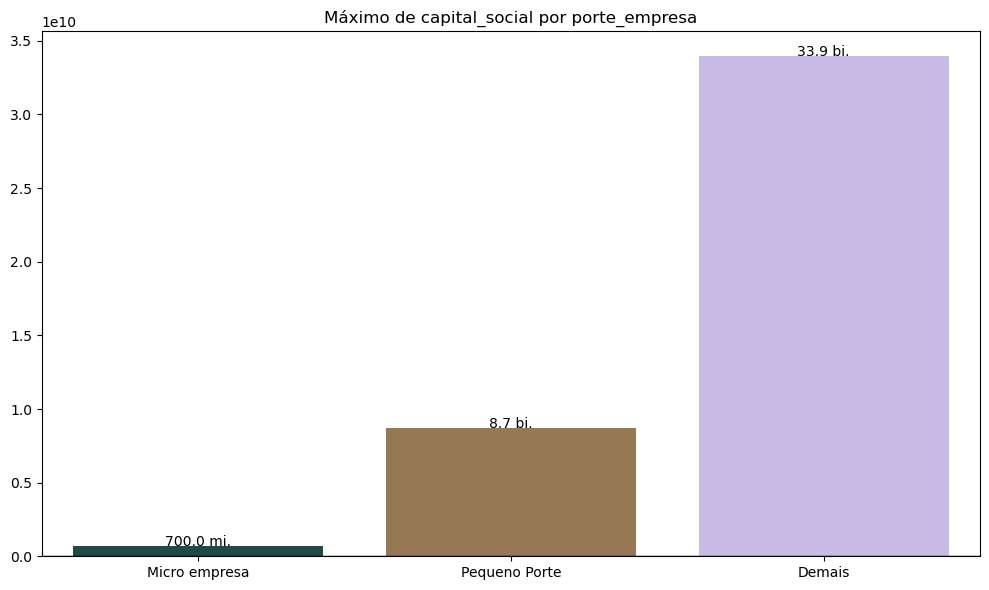

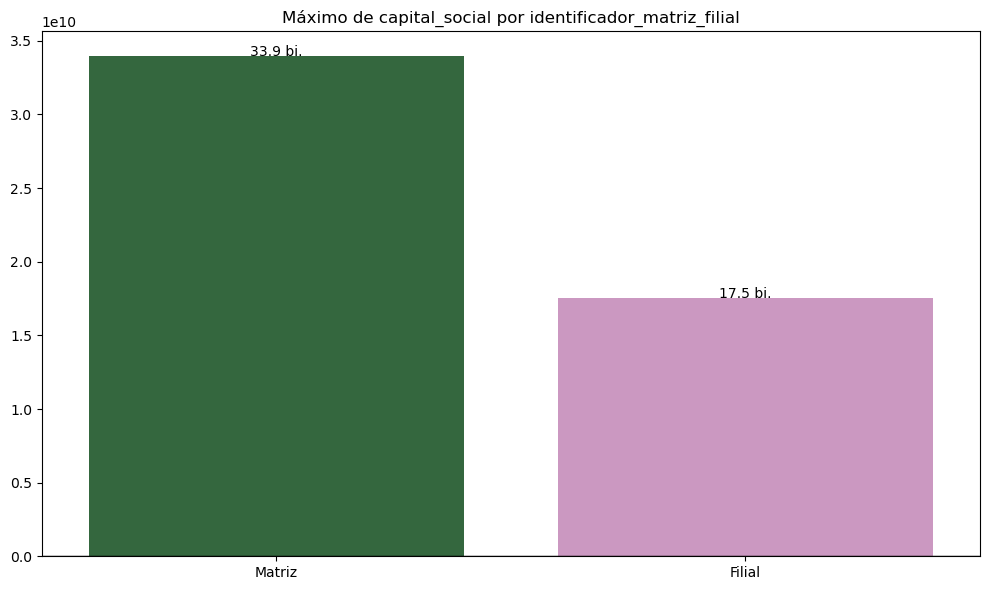

In [50]:
n_vars = df_n.columns
c_vars = df_c.columns

medidas = ('Soma','Média','Máximo')

for medida in medidas:
    for Categoria in c_vars:
        for Valor in n_vars:
            valor_por_categorias(df_t,Categoria,Valor,medida)

# Investigação de dados anômalos

A concentração de valores "0" na variável "capital social" sucita dúvidas sobre a integridade dos dados e exige uma investigação pormenorizada.

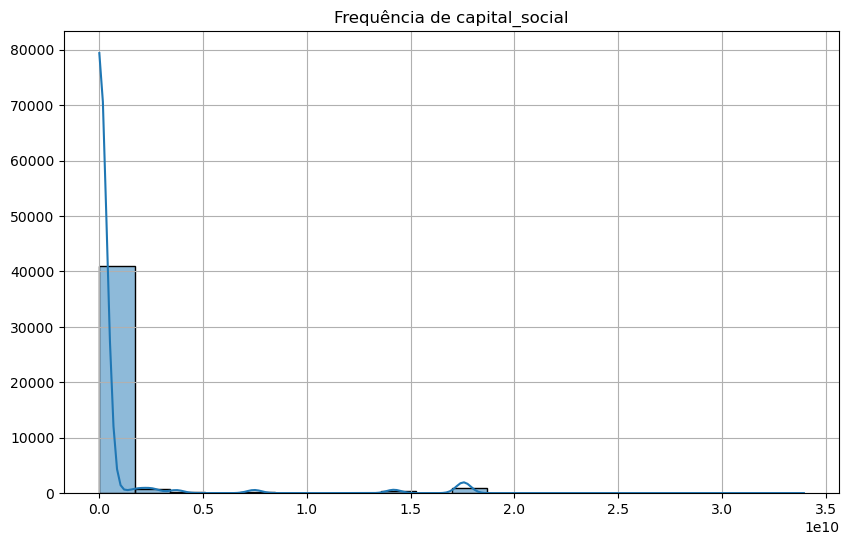

In [51]:
for col in df_n.columns:
    histograma(df_n,col,f'Frequência de {col}')

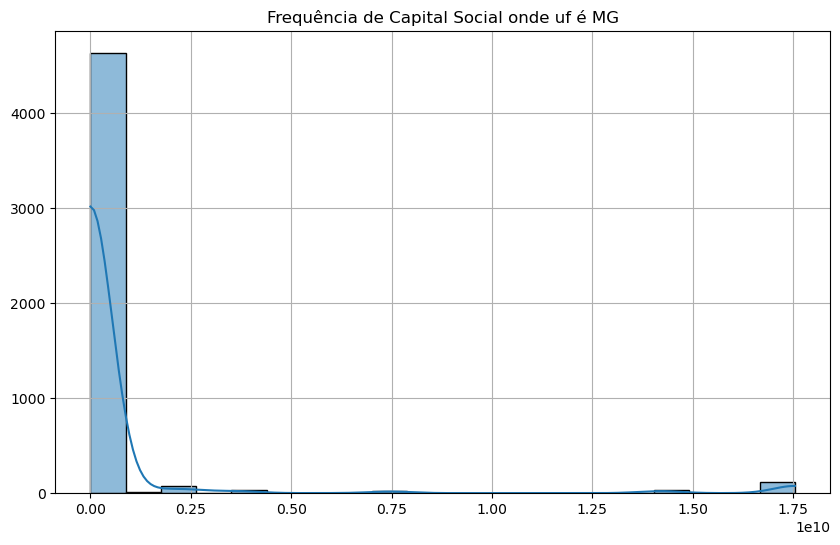

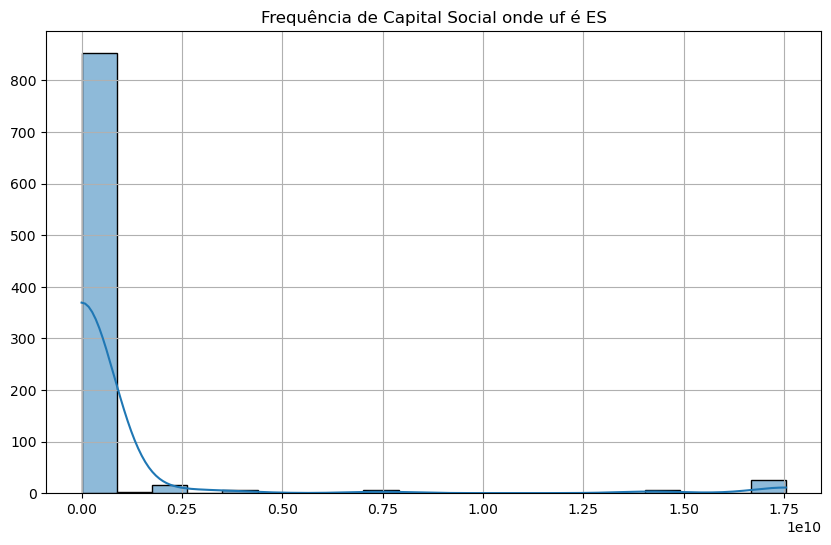

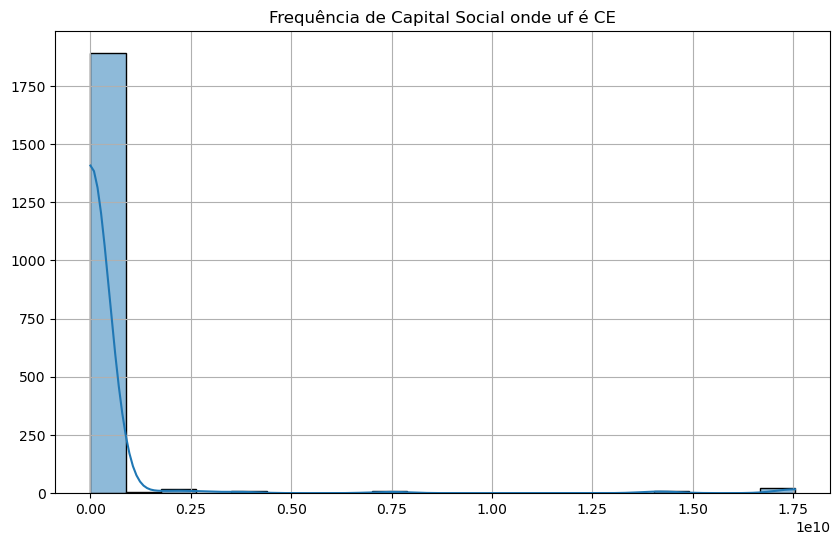

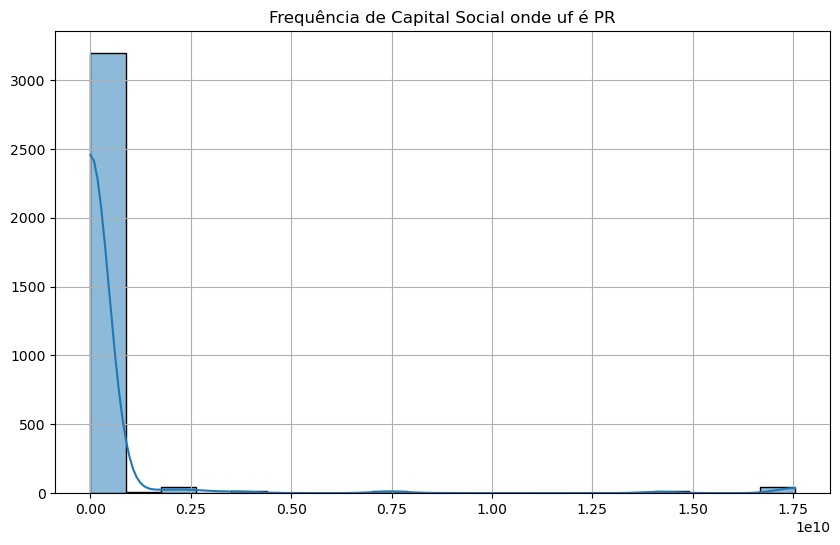

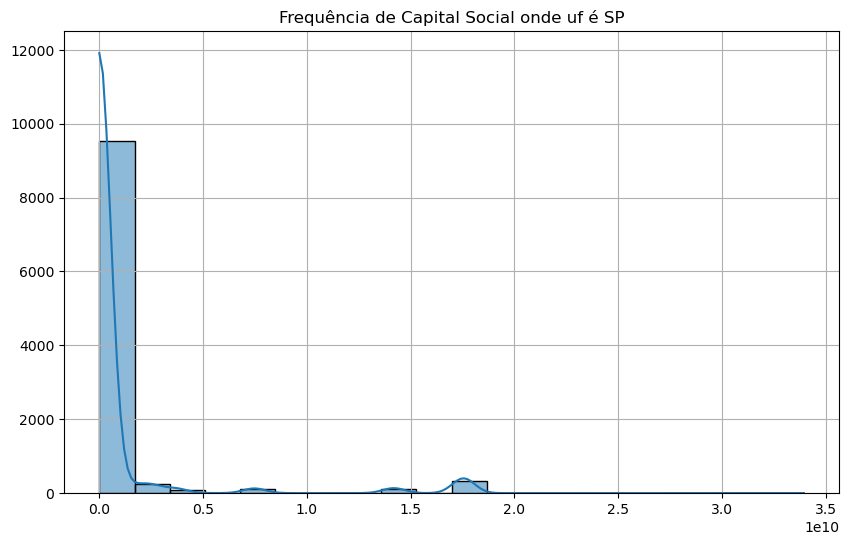

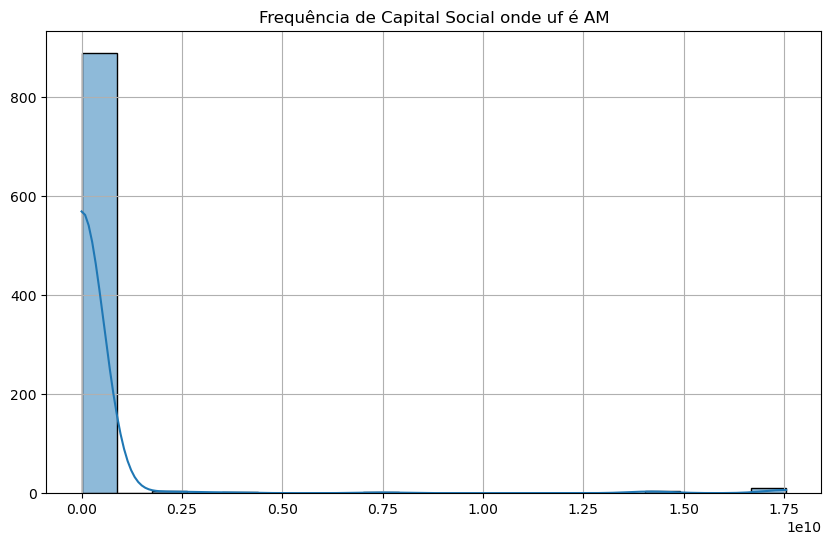

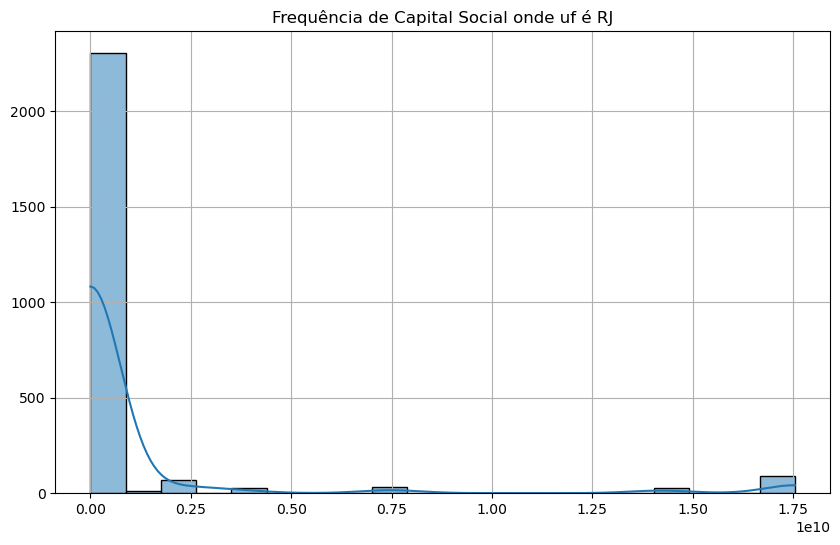

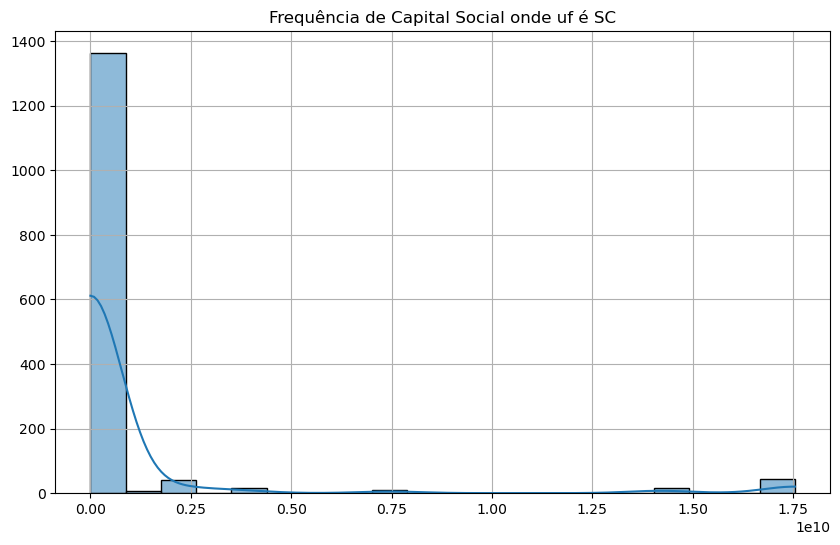

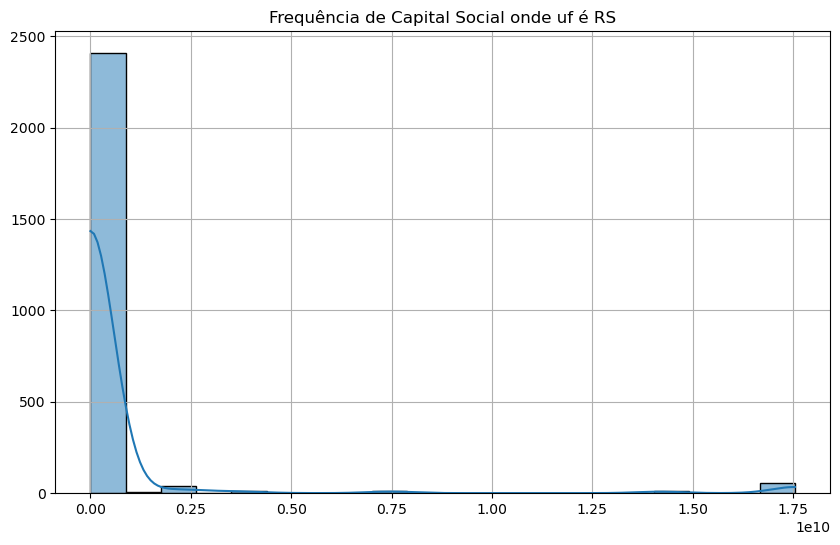

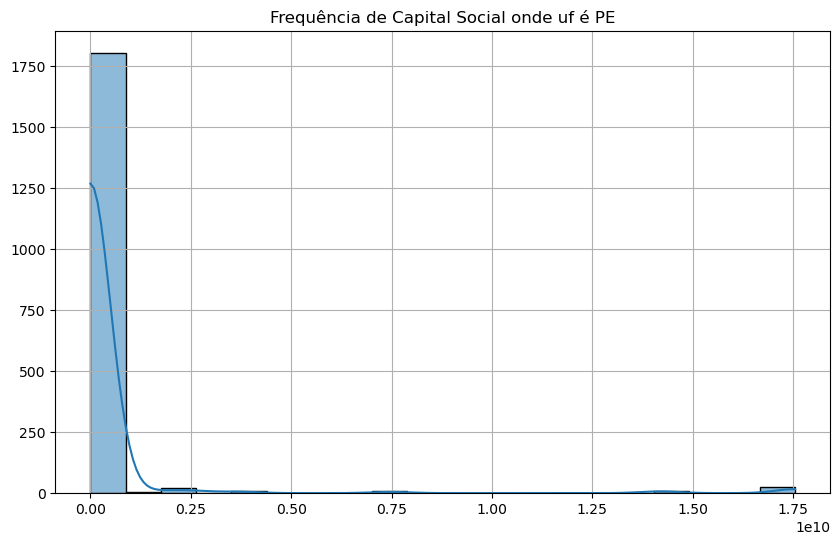

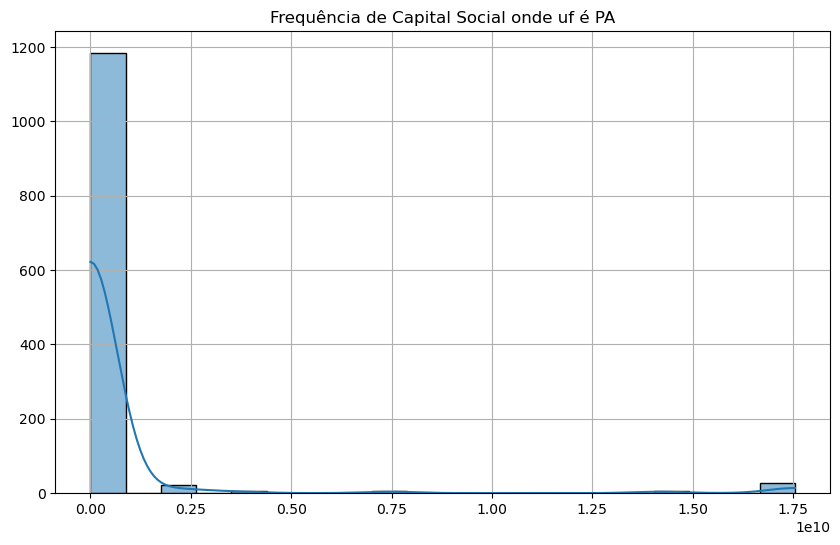

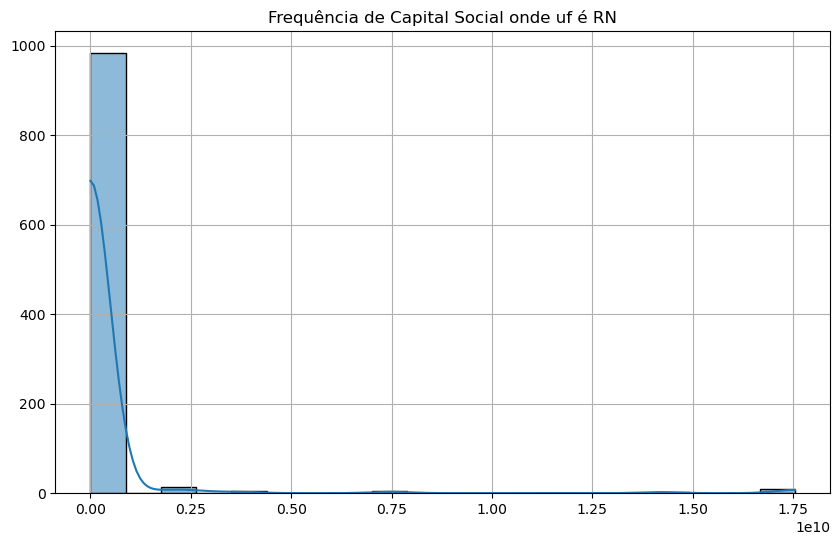

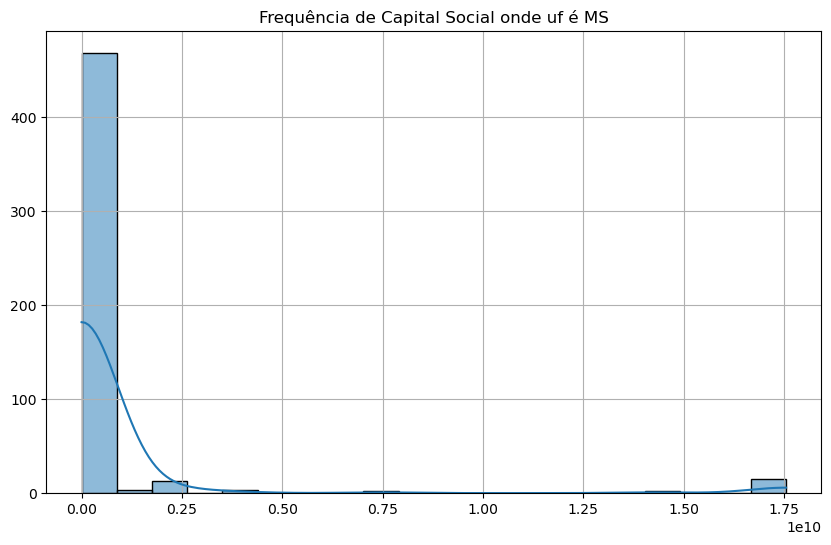

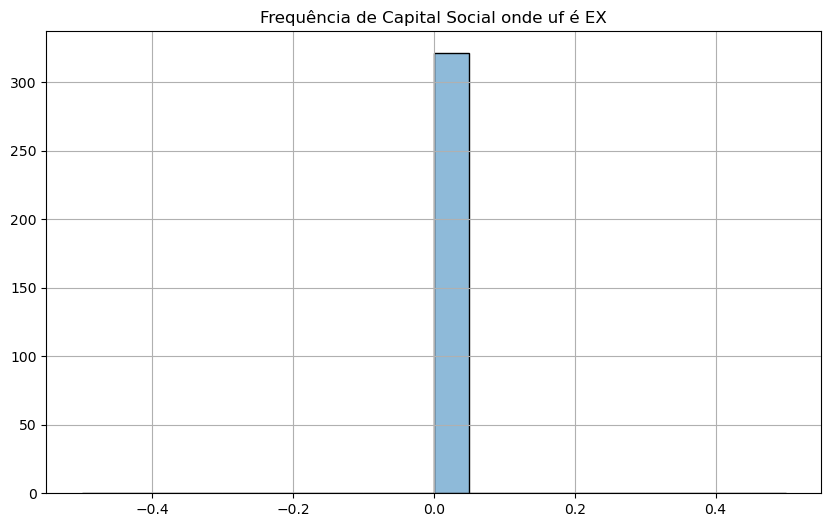

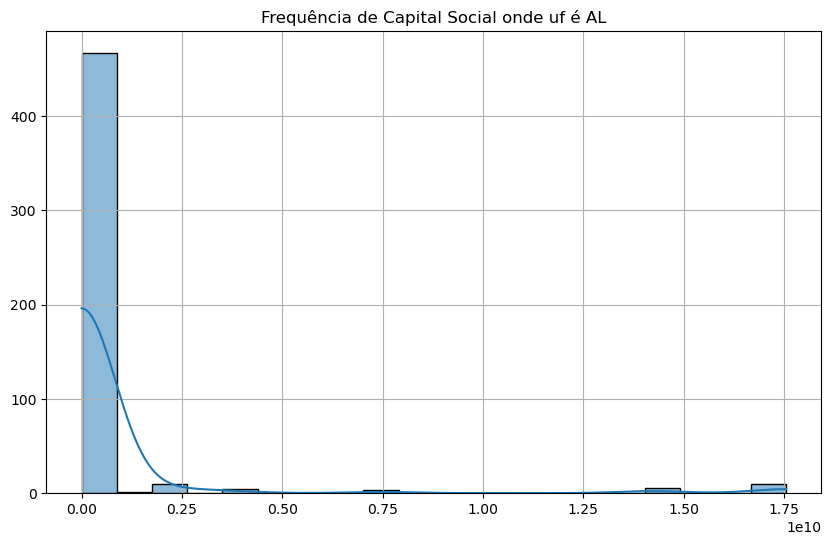

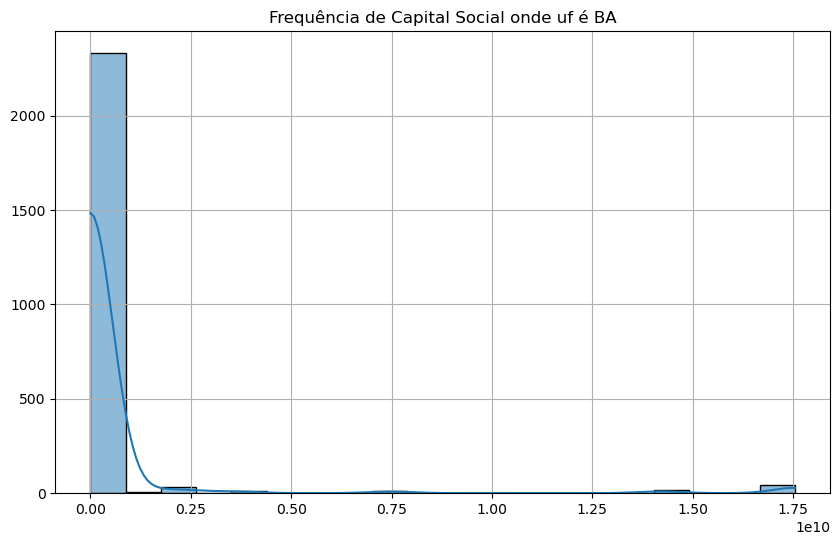

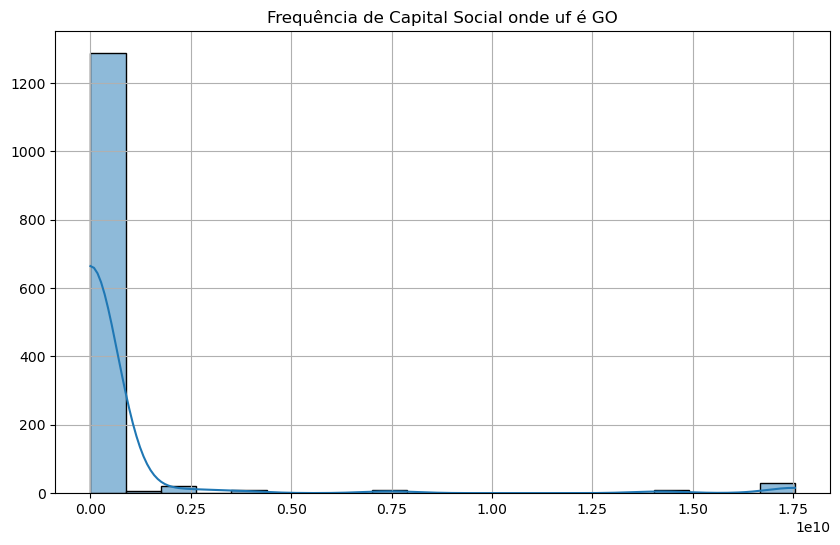

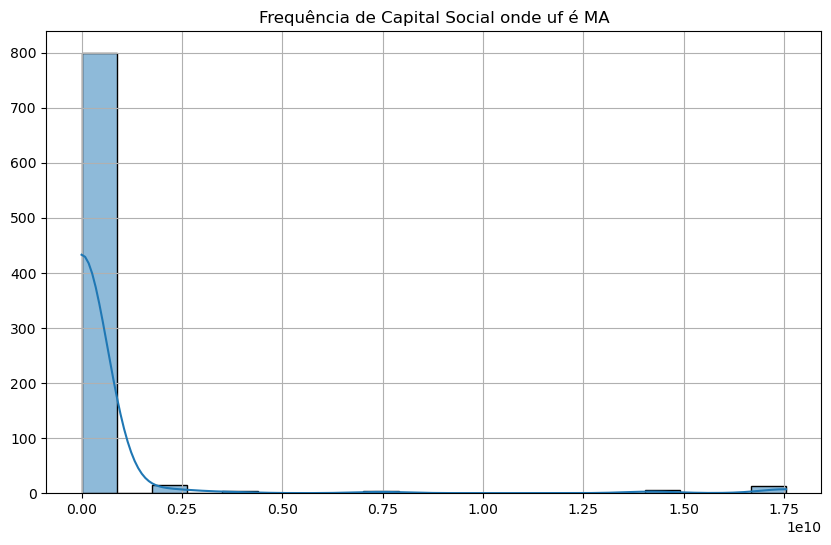

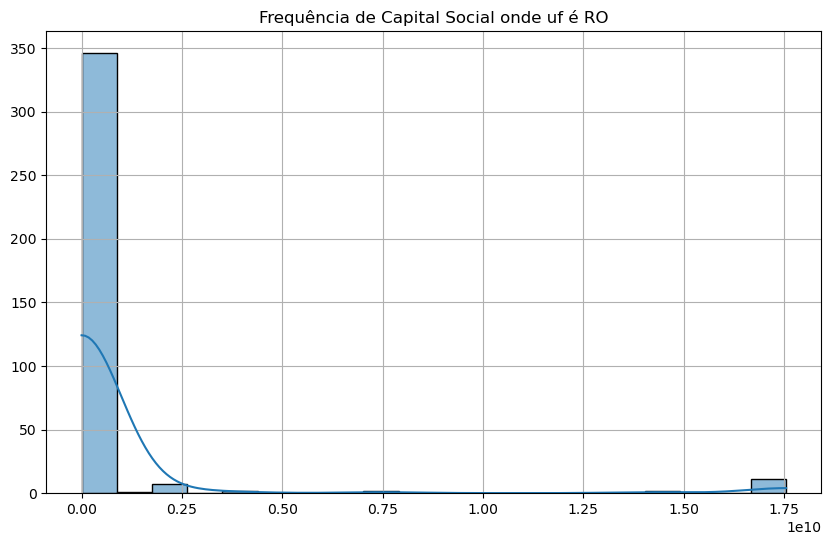

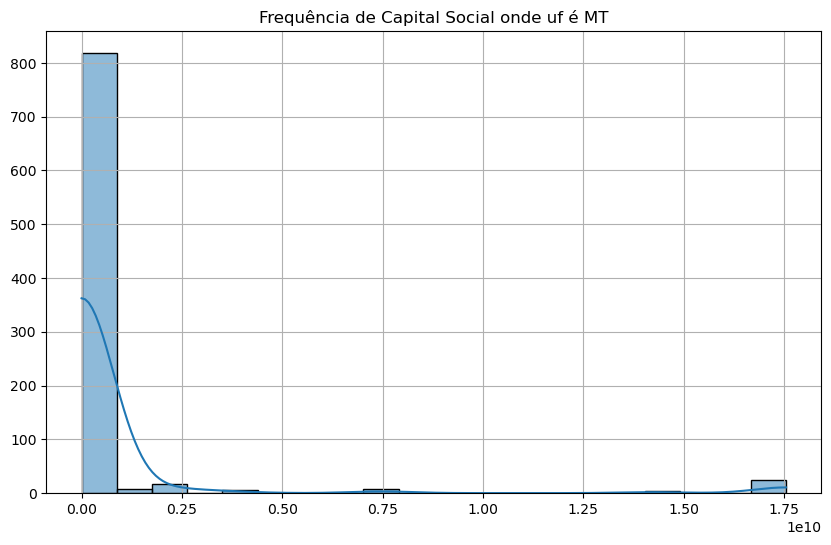

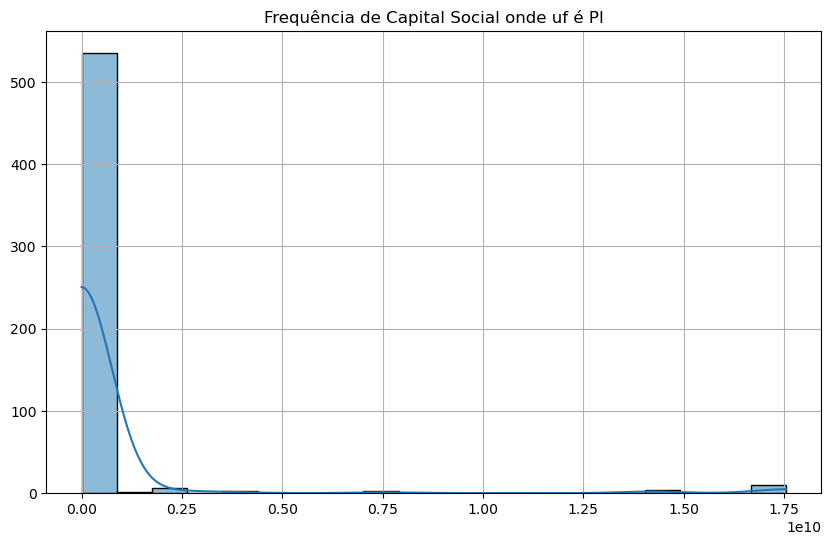

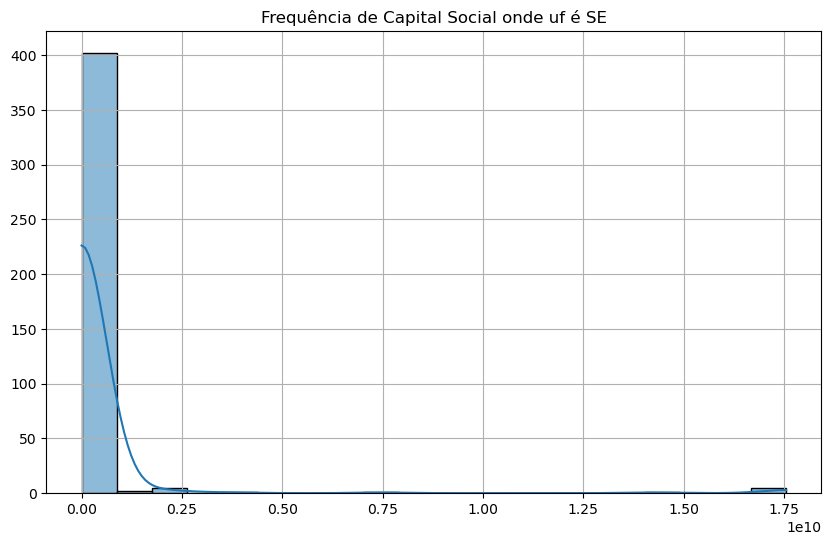

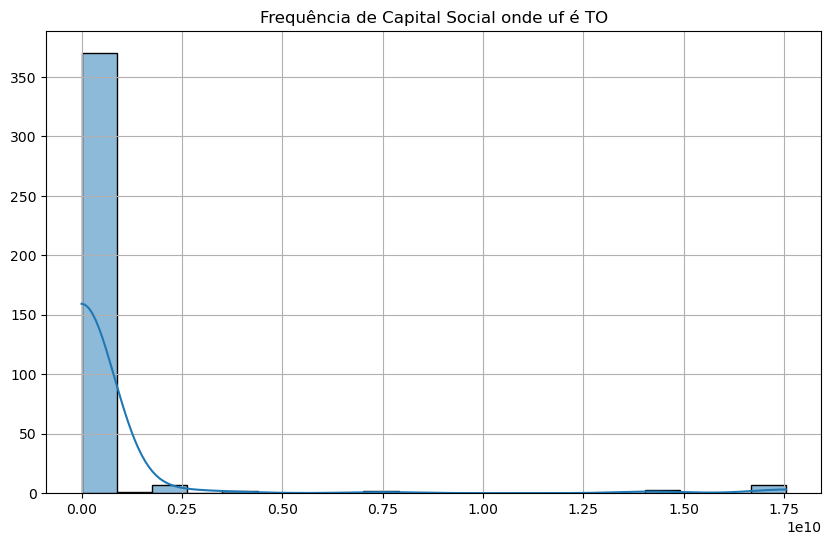

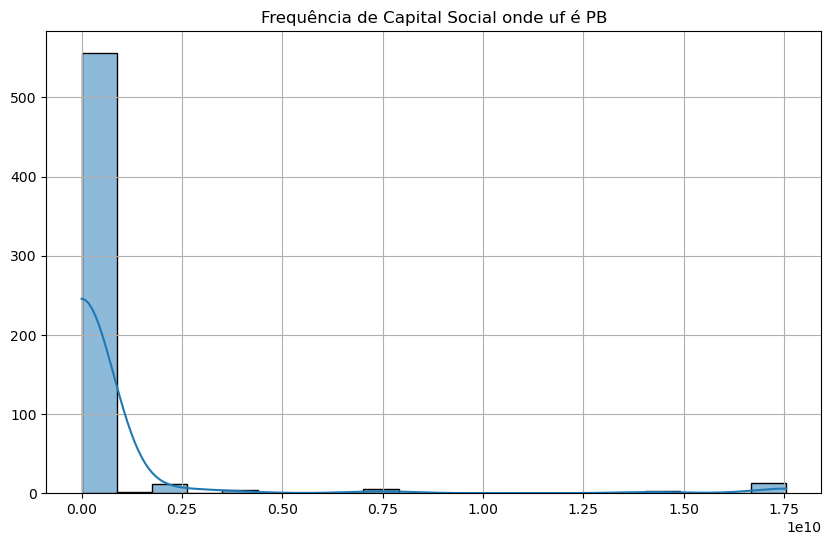

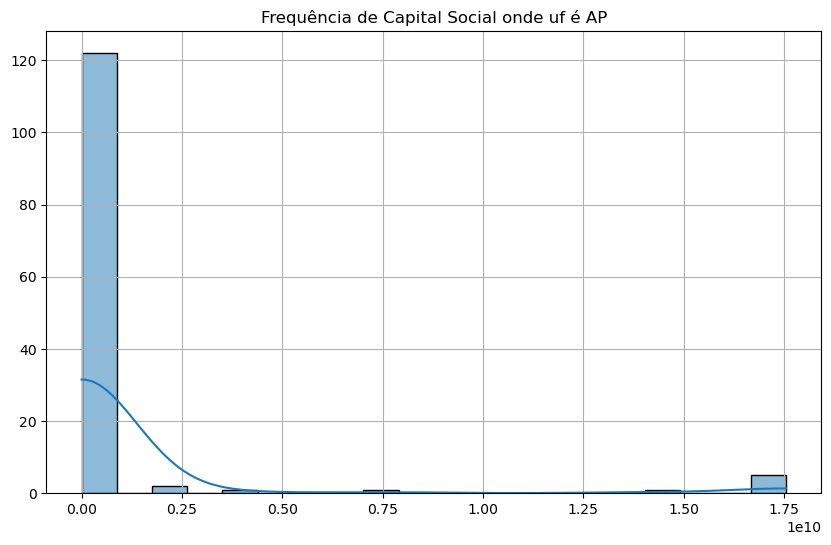

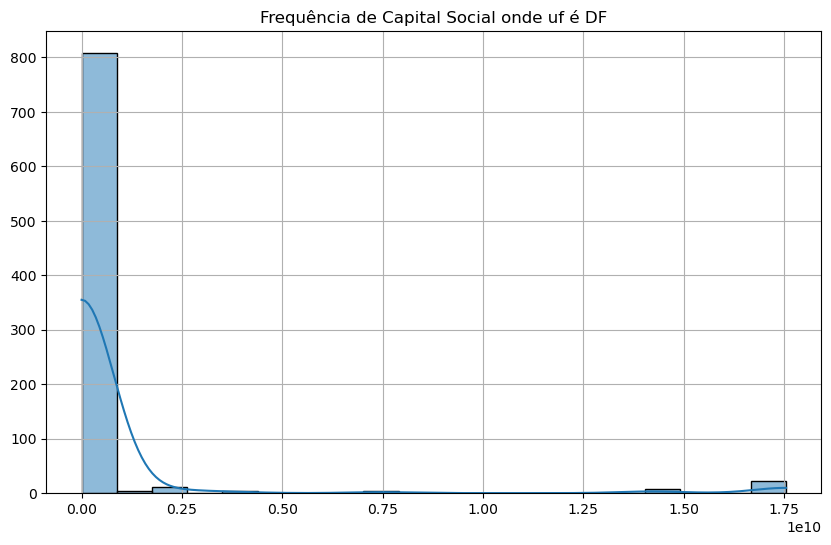

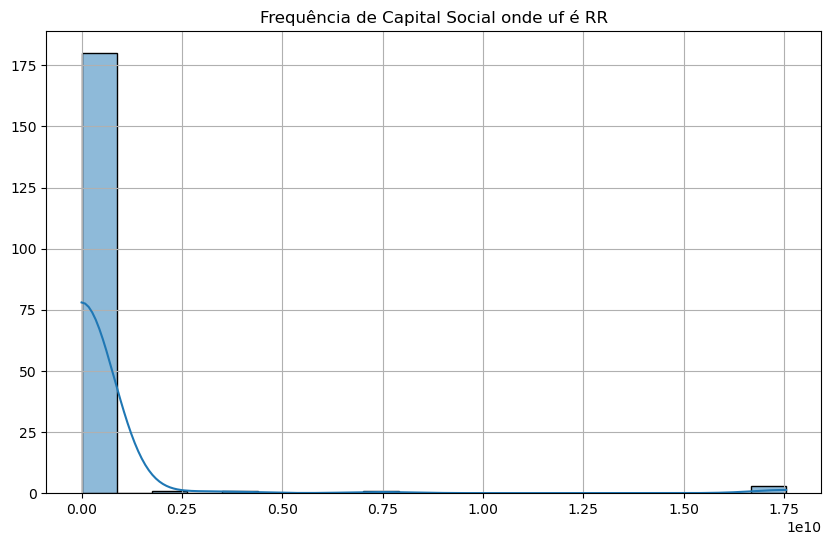

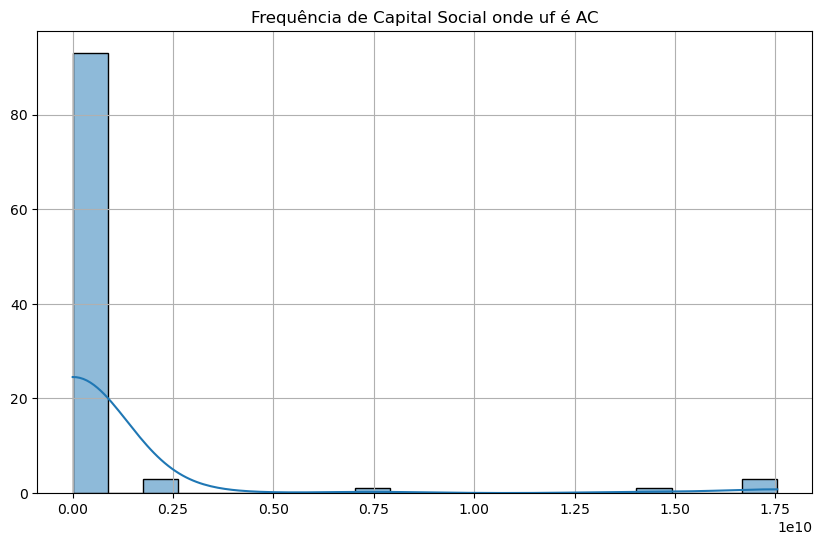

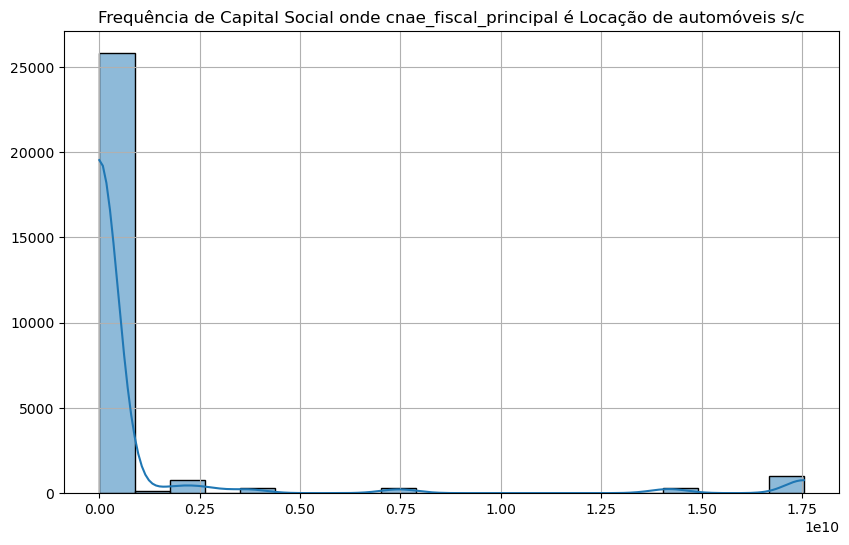

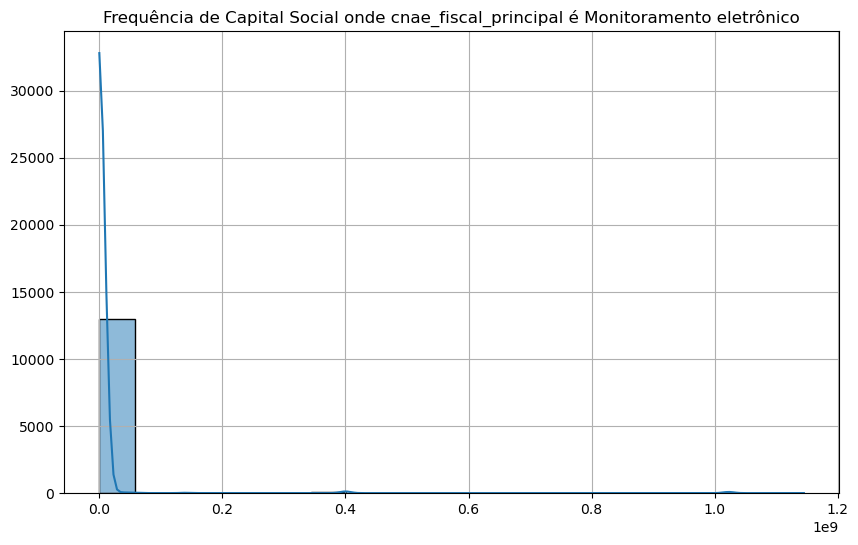

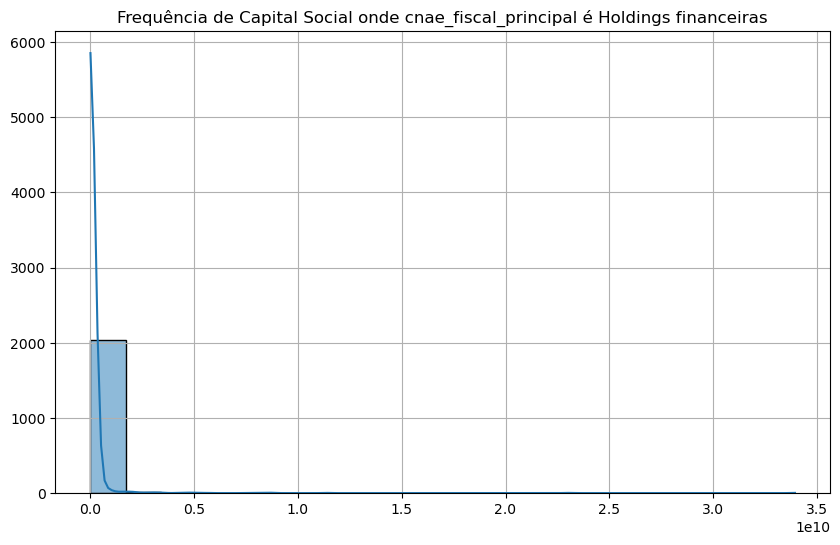

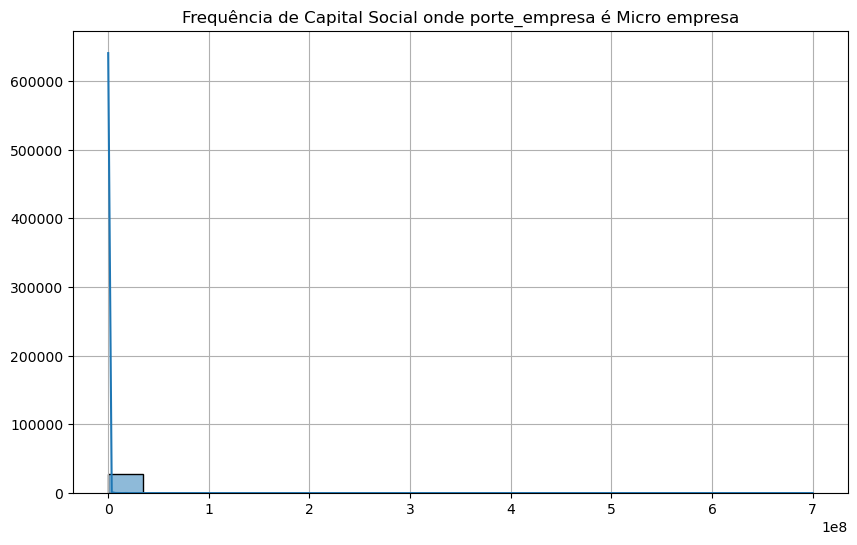

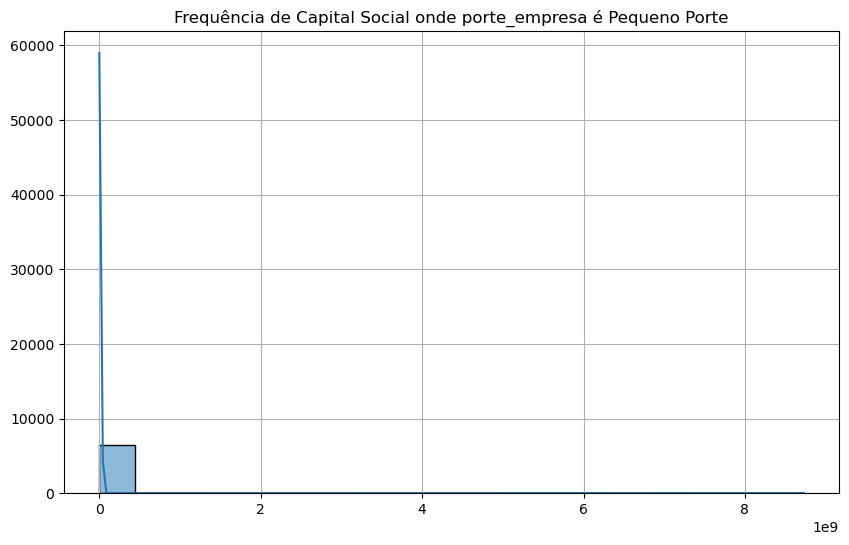

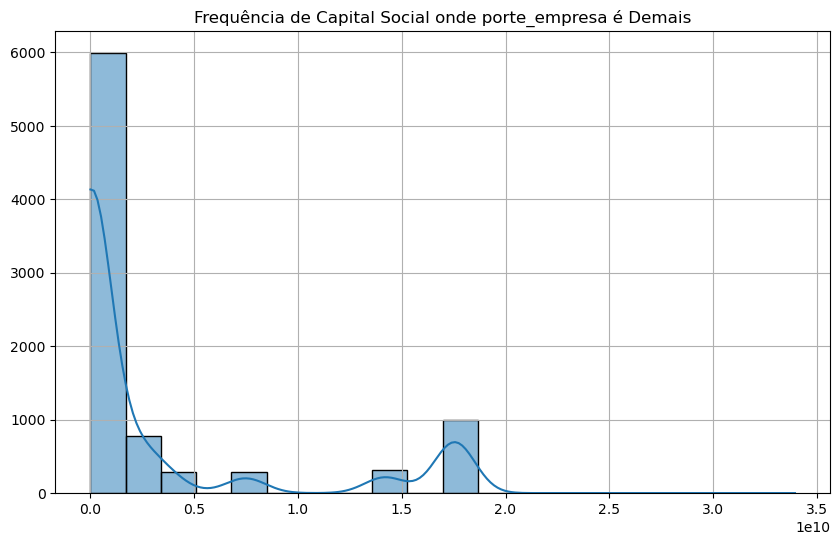

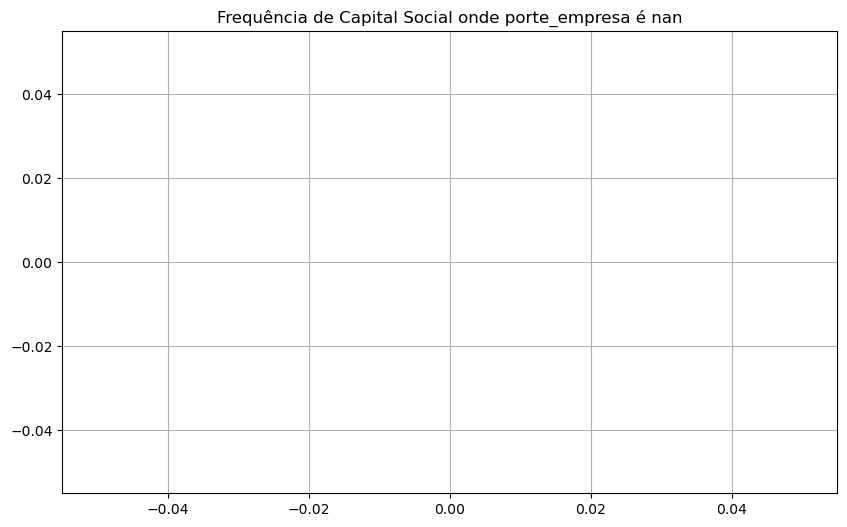

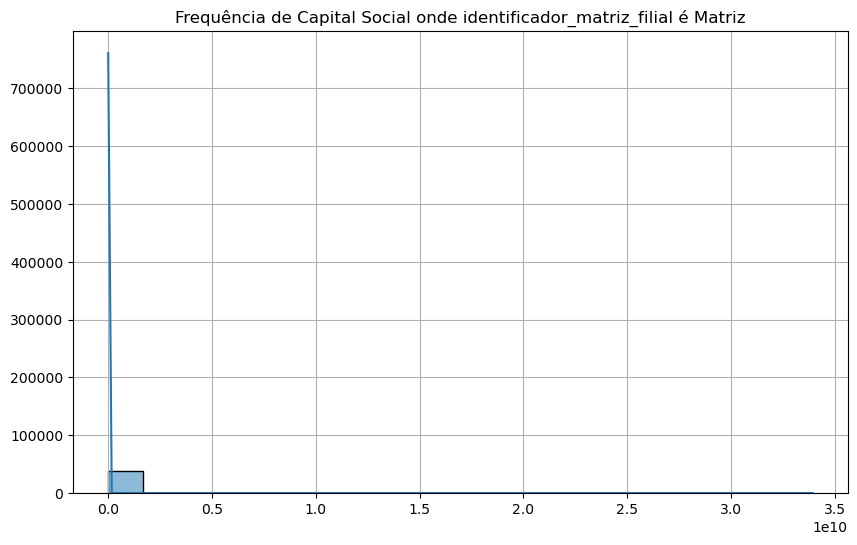

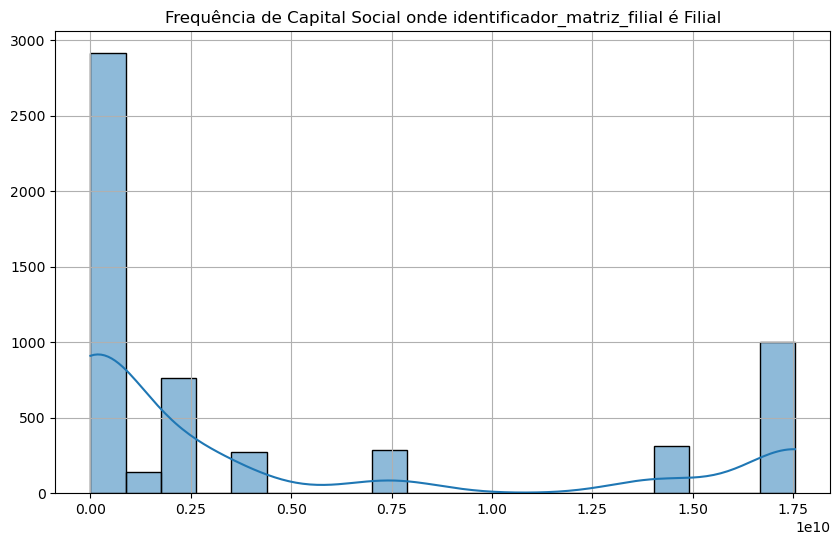

In [52]:
# Na coluna numérica
# Para cada coluna categórica
## Separa as categorias daquela coluna
## Para cada categoria da coluna categórica
### Filtra o df pela categoria na coluna categórica
### Criar um histograma da coluna numérica

for col in c_vars:
    for cat in df[col].unique():
        histograma(df_t[df_t[col] == cat], 'capital_social',f'Frequência de Capital Social onde {col} é {cat}')

Esta série de histogramas demonstra que não há qualquer tendência a aparecer capital social zero de acordo com qualquer característica qualitativa das empresas.

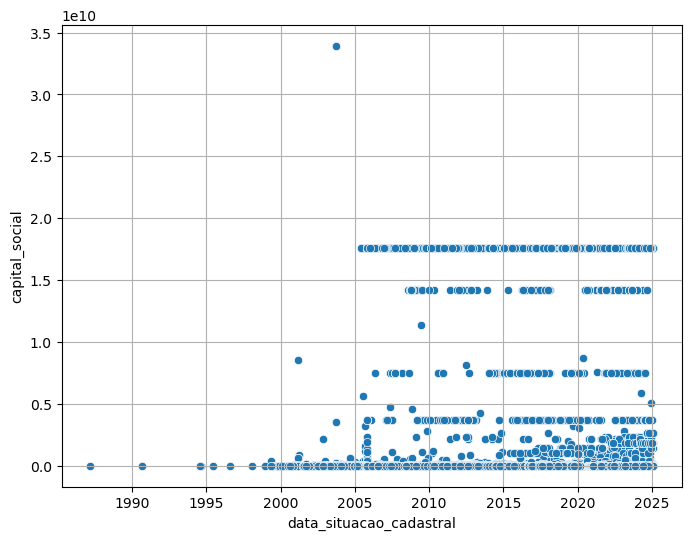

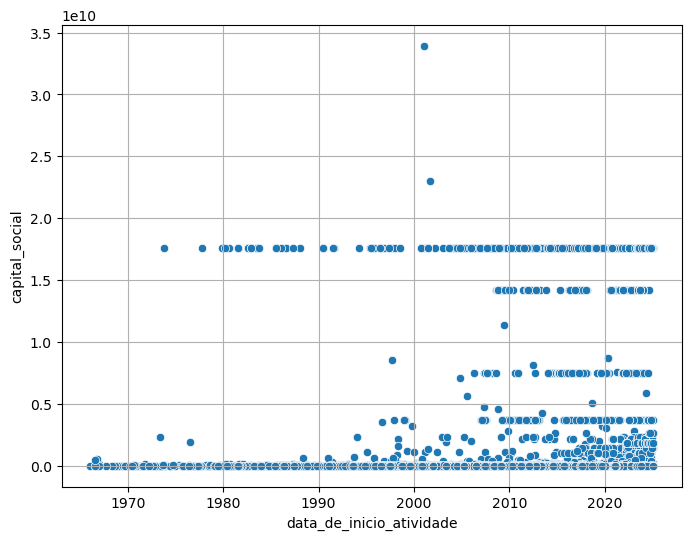

In [53]:
for date in DateTime:
    scatterplots(df_t,date,'capital_social')

Também não há uma tendência visível no tempo.  
Outra característica que levanta suspeita é o número de empresas com capital social idêntico. Cabe uma investigação mais aprofundada da causa desse comportamento, mas isso estaria fora do escopo deste projeto.